# DATA ANALYSIS - Project
Maria Pia Bellini

The dataset "Cardiovascular_Disease_Dataset" is acquired from one of multispeciality hospitals in India, and consists of 1000 patients with 12 features.

This project will be organized in the following way:

* **Exploratory Data Analysis**: Dataset Management, Descriptive Analytics, Data Visualization;

* **Diagnostic Analysis**: PCA, Clustering, Association Rules, Decision Trees, Bayer Classifier;

* **Predictive Analysis**: Logistic regression; K-Nearest Neighbors

# 1. Exploratory Data Analysis

In [2]:
setwd('/Users/mariapiabellini/Desktop/Unicatt/Data Analysis/Progetto/Cardiovascular_Disease_Dataset')
data<-read.csv('Cardiovascular_Disease_Dataset.csv')[,c(2,3,4,5,8,9,11,14)]

The dataset contains informations about 1000 patients and 8 attributes, 4 numerical and 4 categorical.
* **age**: the age of the patient.

* **gender**: the gender of the patient, 0=female, 1=male.

* **chestpain**: identifies the type of pain in the chest felt by the patient: 0=typical angina, 1=atypical angina, 2=non-anginal pain, 3=asymptomatic. The angina pectoris is a particular kind of pain that radiates from the chest to arms, neck and jaw. It can be helpful in establishing if the patient has some heart conditions.

* **restingBP**: the blood pressure measured in resting state, normal value for an healthy patient would be below 120 mm/Hg.

* **restingrelectro**: the results of the electrocardiogram (ECG), 0=normal, 1=ST-T wave abnormality, 2=probable or definite left ventricular hypertrophy. ST and T waves are fluctuations of the ECG whose changes may represent cardiac pathology.

* **maxheartrate**: the maximum heart rate achieved by the patient. A normal value would be around 60-100.

* **oldpeak**: the maximum value reached by the peak of the ST wave. 

* **target**: classification of the patient as 0=no heart disease (no HD), 1=heart disease (HD).

In [3]:
data$gender<-factor(data$gender, levels=c(0,1), labels=c('female','male'))
data$chestpain<-factor(data$chestpain, levels=c(0,1,2,3), labels=c('typical angina','atypical angina','non-anginal pain','asymptomatic'))
data$restingrelectro<-factor(data$restingrelectro, levels=c(0,1,2), labels=c('normal','ST-T wave abnormality','ventricular hypertrophy'))
data$target<-factor(data$target,levels=c(0,1),labels=c('no HD','HD'))
head(data)

age gender chestpain        restingBP restingrelectro         maxheartrate
1 53  male   non-anginal pain 171       ST-T wave abnormality   147         
2 40  male   typical angina    94       ST-T wave abnormality   115         
3 49  male   non-anginal pain 133       normal                  202         
4 43  male   typical angina   138       ST-T wave abnormality   153         
5 31  male   atypical angina  199       ventricular hypertrophy 136         
6 24  male   atypical angina  173       normal                  161         
  oldpeak target
1 5.3     HD    
2 3.7     no HD 
3 5.0     no HD 
4 3.2     HD    
5 5.3     HD    
6 4.7     HD

In [4]:
str(data)

'data.frame':	1000 obs. of  8 variables:
 $ age            : int  53 40 49 43 31 24 79 52 62 61 ...
 $ gender         : Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 2 2 1 ...
 $ chestpain      : Factor w/ 4 levels "typical angina",..: 3 1 3 1 2 2 3 1 1 1 ...
 $ restingBP      : int  171 94 133 138 199 173 130 127 121 190 ...
 $ restingrelectro: Factor w/ 3 levels "normal","ST-T wave abnormality",..: 2 2 1 2 3 1 3 1 2 2 ...
 $ maxheartrate   : int  147 115 202 153 136 161 157 192 138 150 ...
 $ oldpeak        : num  5.3 3.7 5 3.2 5.3 4.7 2.5 4.9 2.8 2.9 ...
 $ target         : Factor w/ 2 levels "no HD","HD": 2 1 1 2 2 2 2 1 1 2 ...


The datasets doesn't contain any missing value.

In [5]:
summary(is.na(data)=="TRUE")

    age            gender        chestpain       restingBP      
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:1000      FALSE:1000      FALSE:1000      FALSE:1000     
 restingrelectro maxheartrate     oldpeak          target       
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:1000      FALSE:1000      FALSE:1000      FALSE:1000     

In [6]:
summary(data[data$target=='no HD',])
summary(data[data$target=='HD',])

      age           gender               chestpain     restingBP    
 Min.   :20.00   female:102   typical angina  :312   Min.   : 94.0  
 1st Qu.:32.00   male  :318   atypical angina : 70   1st Qu.:122.0  
 Median :49.00                non-anginal pain: 33   Median :130.0  
 Mean   :49.07                asymptomatic    :  5   Mean   :134.8  
 3rd Qu.:66.00                                       3rd Qu.:142.0  
 Max.   :80.00                                       Max.   :200.0  
                restingrelectro  maxheartrate      oldpeak       target   
 normal                 :276    Min.   : 71.0   Min.   :0.00   no HD:420  
 ST-T wave abnormality  :136    1st Qu.:103.8   1st Qu.:1.10   HD   :  0  
 ventricular hypertrophy:  8    Median :134.0   Median :2.30              
                                Mean   :136.3   Mean   :2.51              
                                3rd Qu.:171.0   3rd Qu.:3.80              
                                Max.   :202.0   Max.   :6.20       

      age           gender               chestpain     restingBP  
 Min.   :20.00   female:133   typical angina  :108   Min.   : 94  
 1st Qu.:35.00   male  :447   atypical angina :154   1st Qu.:143  
 Median :49.00                non-anginal pain:279   Median :168  
 Mean   :49.37                asymptomatic    : 39   Mean   :164  
 3rd Qu.:63.00                                       3rd Qu.:187  
 Max.   :80.00                                       Max.   :200  
                restingrelectro  maxheartrate      oldpeak        target   
 normal                 :178    Min.   : 96.0   Min.   :0.000   no HD:  0  
 ST-T wave abnormality  :208    1st Qu.:133.0   1st Qu.:1.400   HD   :580  
 ventricular hypertrophy:194    Median :152.0   Median :2.700              
                                Mean   :152.1   Mean   :2.851              
                                3rd Qu.:175.0   3rd Qu.:4.300              
                                Max.   :202.0   Max.   :6.200              

In [7]:
aggregate(data[,c(1,4,6,7)], by=list(data$target), FUN=mean)

Group.1 age      restingBP maxheartrate oldpeak 
1 no HD   49.06667 134.7690  136.3071     2.509524
2 HD      49.36897 164.0414  152.1172     2.851207

In [8]:
table(data$gender, data$target)

        
         no HD  HD
  female   102 133
  male     318 447

In [9]:
table(data$chestpain,data$target)

                  
                   no HD  HD
  typical angina     312 108
  atypical angina     70 154
  non-anginal pain    33 279
  asymptomatic         5  39

In [10]:
table(data$restingrelectro,data$target)

                         
                          no HD  HD
  normal                    276 178
  ST-T wave abnormality     136 208
  ventricular hypertrophy     8 194

### Maximum heart rate
The dotted line highlights the median of the maximum heart rate for healthy patients (grey histogram) and heart diseased patients (red histogram).

As we can see in the second case maximum heart rate values are generally more elevated. 

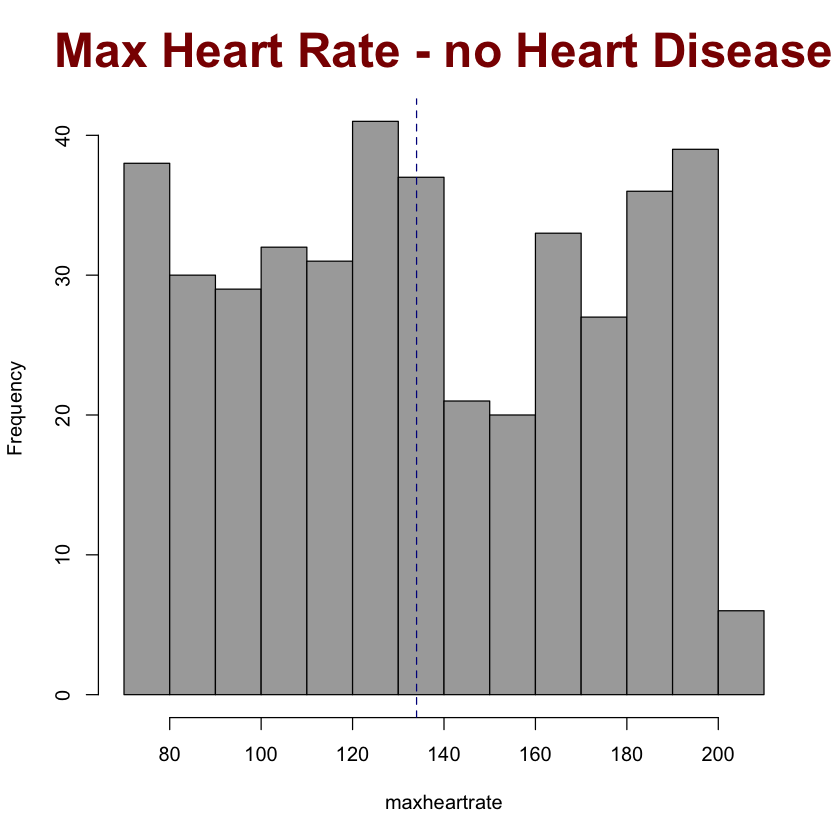

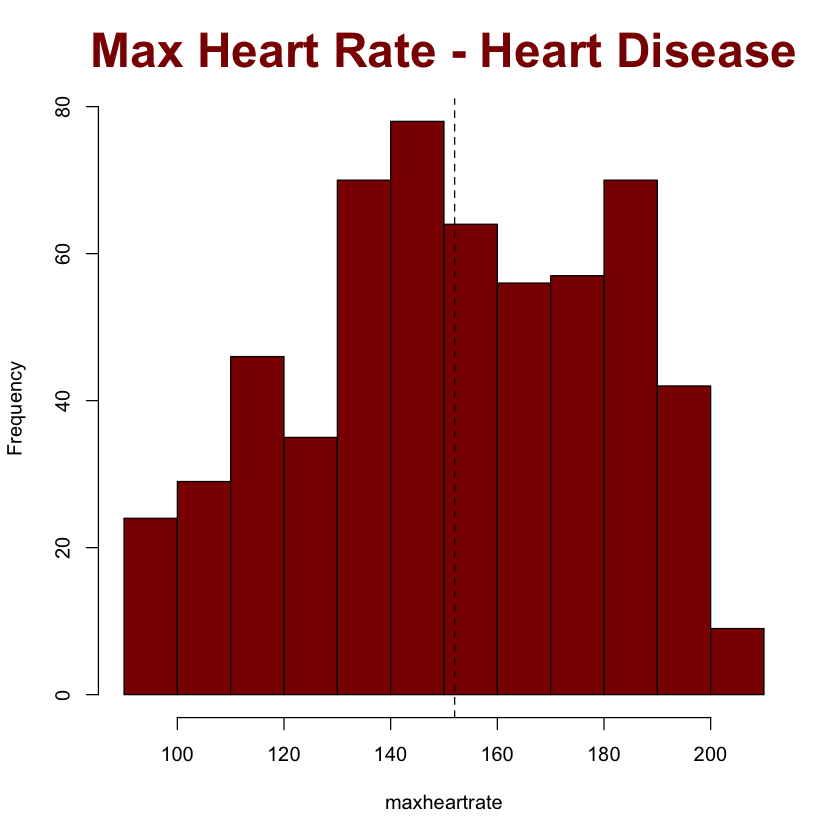

In [11]:
hist(data$maxheartrate[data$target=='no HD'], col='darkgrey',main = "Max Heart Rate - no Heart Disease",
      cex.main = 2.4,   font.main= 2, col.main= "darkred", xlab='maxheartrate', ylab='Frequency')
abline(v=median(data$maxheartrate[data$target=='no HD']), lty=2, col='darkblue')

hist(data$maxheartrate[data$target=='HD'], col='darkred', main = "Max Heart Rate - Heart Disease",
      cex.main = 2.4,   font.main= 2, col.main= "darkred", xlab='maxheartrate', ylab='Frequency')
abline(v=median(data$maxheartrate[data$target=='HD']), lty=2)

In [12]:
summary(data$maxheartrate[data$target=='no HD'])
summary(data$maxheartrate[data$target=='HD'])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   71.0   103.8   134.0   136.3   171.0   202.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   96.0   133.0   152.0   152.1   175.0   202.0 

### Resting Blood Pressure 

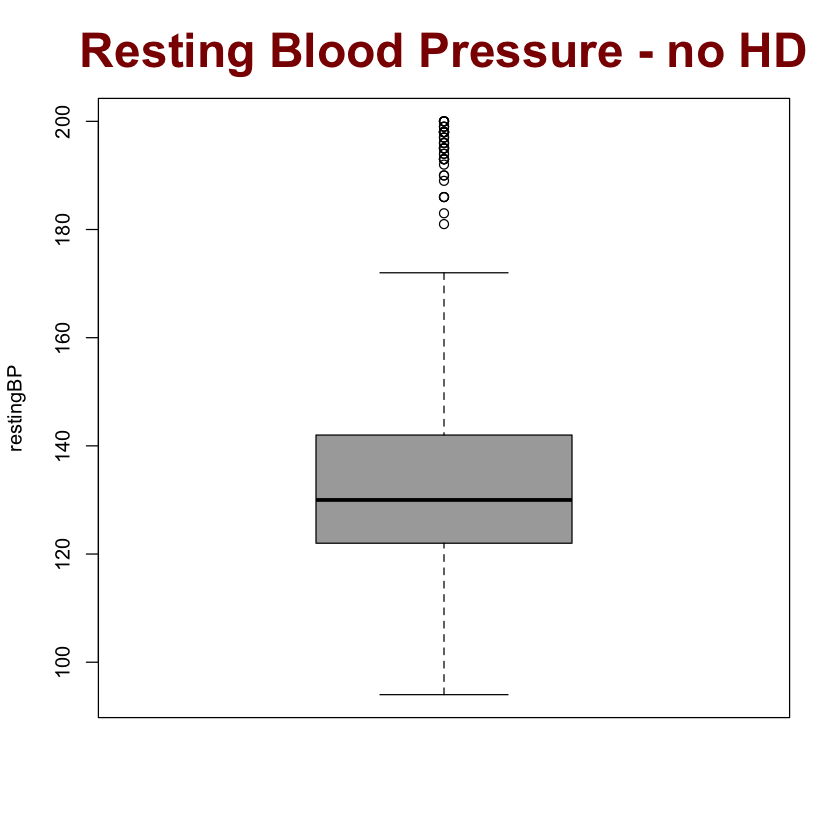

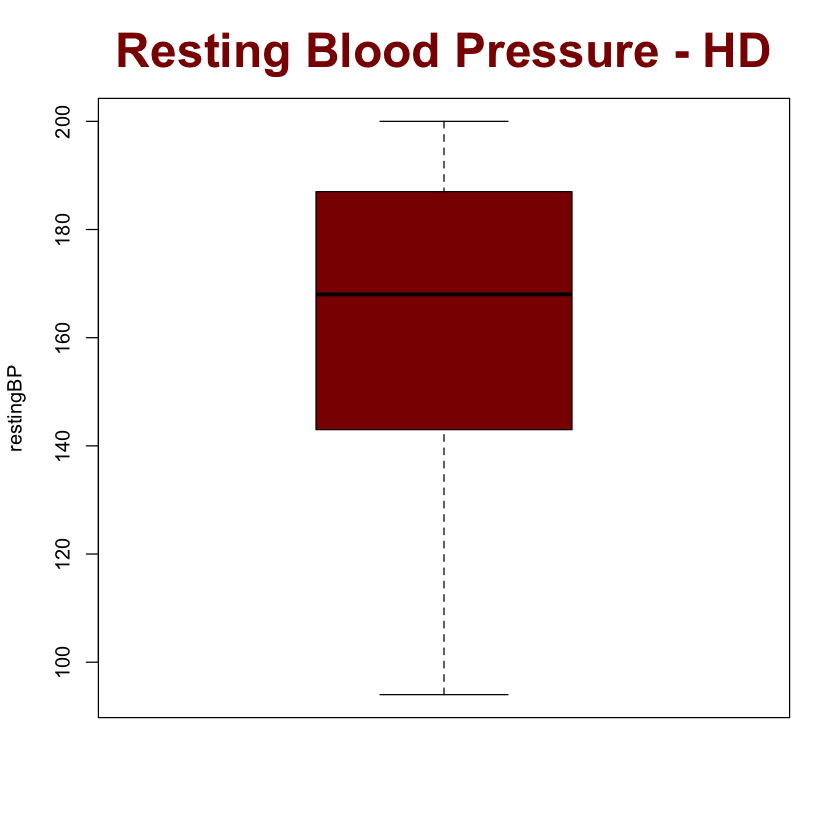

In [12]:
boxplot(data$restingBP[data$target=='no HD'], col='darkgrey',main = "Resting Blood Pressure - no HD",
      cex.main = 2.4,   font.main= 2, col.main= "darkred", ylab='restingBP')
boxplot(data$restingBP[data$target=='HD'], col='darkred',main = "Resting Blood Pressure - HD",
      cex.main = 2.4,   font.main= 2, col.main= "darkred", ylab='restingBP')

In [13]:
summary(data$restingBP[data$target=='no HD'])
summary(data$restingBP[data$target=='HD'])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   94.0   122.0   130.0   134.8   142.0   200.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     94     143     168     164     187     200 

### TS wave peak
The ST segment encompasses the region between the end of ventricular depolarization and beginning of ventricular repolarization, ST-segment elevation may indicates a blockage of thecoronary artery and severe problems at the heart muscle.

As we can see from the stacked plot the value reached by the peak is almost the double for the patients with heart disease.

In [13]:
install.packages('ggplot2')
install.packages('viridis')
install.packages('hrbrthemes')


I pacchetti binari scaricati sono in
	/var/folders/cl/2n2m21_9053fvwntblb1fmwm0000gn/T//Rtmpf7j5Ag/downloaded_packages

I pacchetti binari scaricati sono in
	/var/folders/cl/2n2m21_9053fvwntblb1fmwm0000gn/T//Rtmpf7j5Ag/downloaded_packages

I pacchetti binari scaricati sono in
	/var/folders/cl/2n2m21_9053fvwntblb1fmwm0000gn/T//Rtmpf7j5Ag/downloaded_packages


Caricamento del pacchetto richiesto: viridisLite



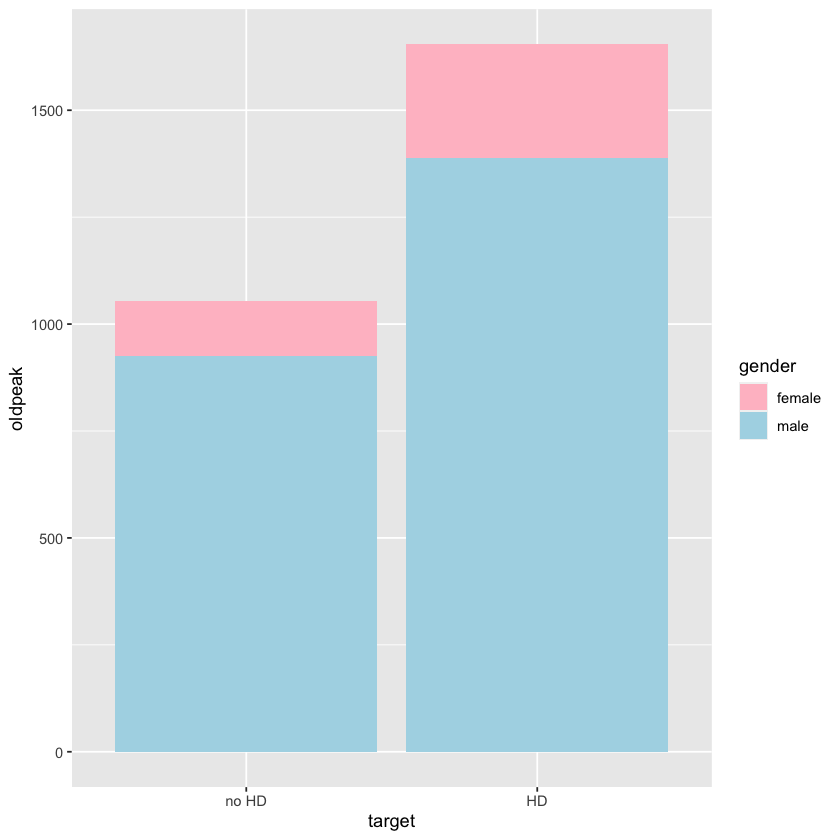

In [15]:
library(ggplot2)
library(viridis)
library(hrbrthemes)

gender<-data$gender
oldpeak<-data$oldpeak
target<-data$target
ggplot(data, aes(fill=gender, y=oldpeak, x=target)) + 
    geom_bar(position="stack", stat="identity") + 
    scale_fill_manual(values=c("pink", "lightblue"))

## 2. Diagnostic Analysis
Now I want to investigate the presence of interesting patterns in the data, and eventually classifying and dividing the individuals in a meaningful way.

The first step will be observing the scatterplots obtained relating the variables by each other, and coloring according to the variable target.

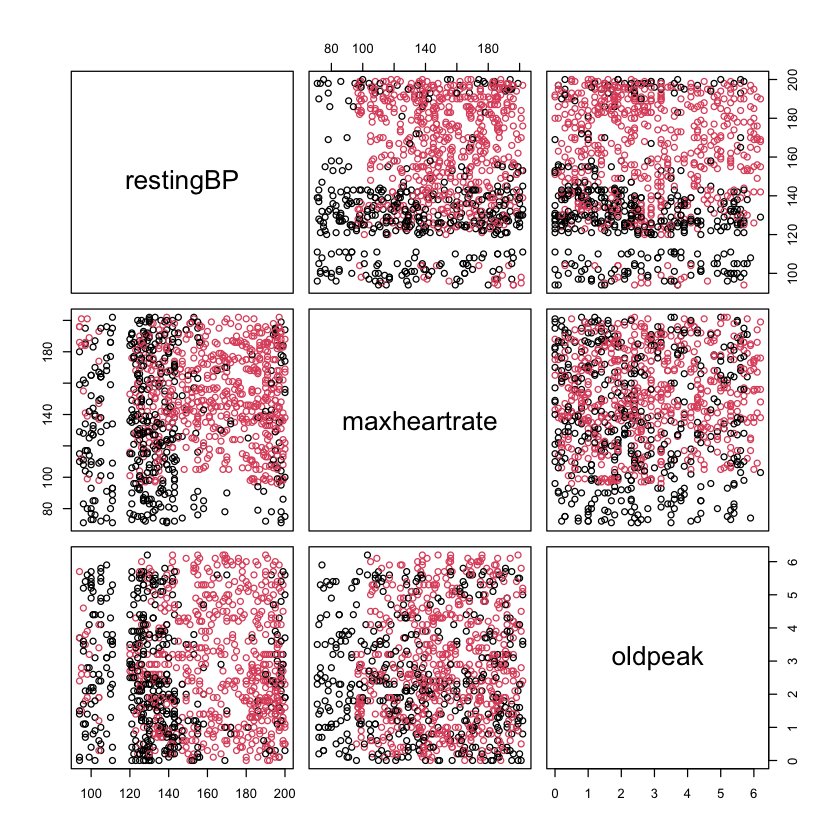

In [45]:
pairs(data[,c(4,6,7)], col=data[,8])

In [14]:
install.packages("scatterplot3d")


I pacchetti binari scaricati sono in
	/var/folders/cl/2n2m21_9053fvwntblb1fmwm0000gn/T//Rtmpf7j5Ag/downloaded_packages


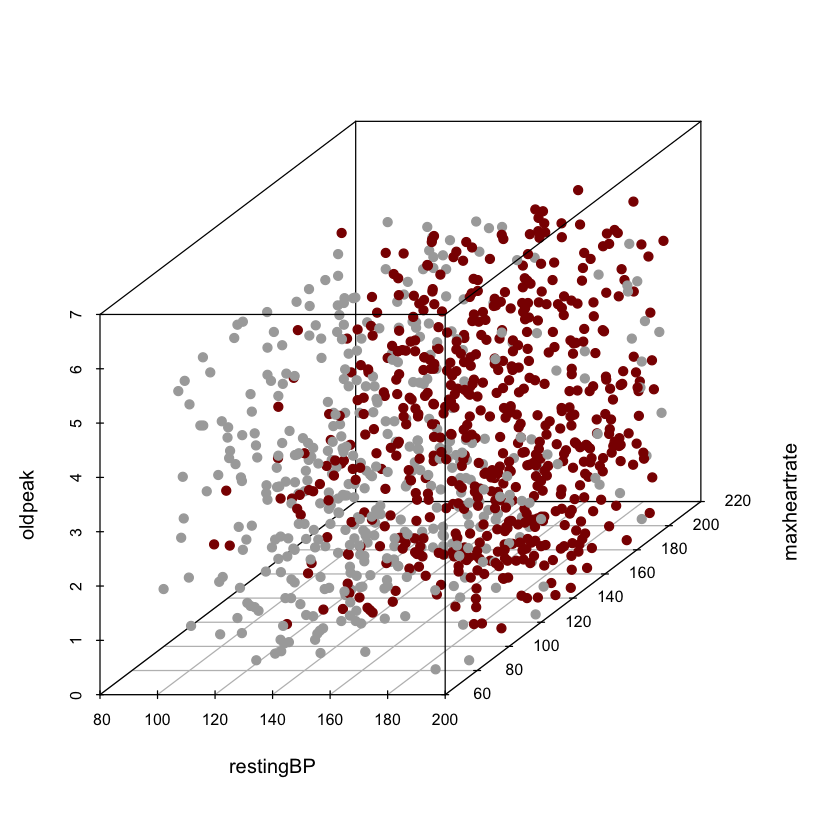

In [18]:
library("scatterplot3d")
scatterplot3d(data[,c(4,6,7)], color=coltable[data$target],pch=19)

## PCA
Principal Component Analysis is a statistical technique for data reduction. This method has the aim of reduce the number of variables describing the data, without loosing too much information.

The variance is considered the most important property of the data, in fact PCA projects a linear transformation of the variables in a cartesian space, where the linear combination explaining the largest portion of the original variance is projected on the first axis, the second perpendicular to the first direction with the largest variance on the second axis and so on.

* Data Normalization:

In [15]:
data_sc<-scale(data[,-c(2,3,5,8)])
data_pca<-prcomp(data_sc)
data_pca

Standard deviations (1, .., p=4):
[1] 1.0591863 1.0061434 0.9868630 0.9444052

Rotation (n x k) = (4 x 4):
                    PC1        PC2        PC3        PC4
age          -0.3619558 -0.4428389 0.81416836  0.1000579
restingBP     0.5664524 -0.5327707 0.03916298 -0.6274977
maxheartrate  0.6747692 -0.1119299 0.15140310  0.7136073
oldpeak       0.3046412  0.7124050 0.55917193 -0.2949570

In [20]:
head(data_pca$x)

PC1        PC2       PC3         PC4       
[1,]  0.7768085 0.6327799  1.04556194 -0.7946891
[2,] -1.3301870 1.7664085 -0.30917212  0.3513118
[3,]  1.1718653 1.1033019  0.95966820  1.1780244
[4,]  0.1022283 0.5783337 -0.10914953  0.3255449
[5,]  1.5347582 0.7163072  0.03081629 -1.7338404
[6,]  1.5722586 1.0218487 -0.40645110 -0.6039458

In [21]:
summary(data_pca)

Importance of components:
                          PC1    PC2    PC3    PC4
Standard deviation     1.0592 1.0061 0.9869 0.9444
Proportion of Variance 0.2805 0.2531 0.2435 0.2230
Cumulative Proportion  0.2805 0.5335 0.7770 1.0000

For this dataset PCA isn't very effective, as we can see the first three components only explain the 77.70% of the data.
That could be because of the elevated number of observations, as PCA is better suitable for smaller samples.

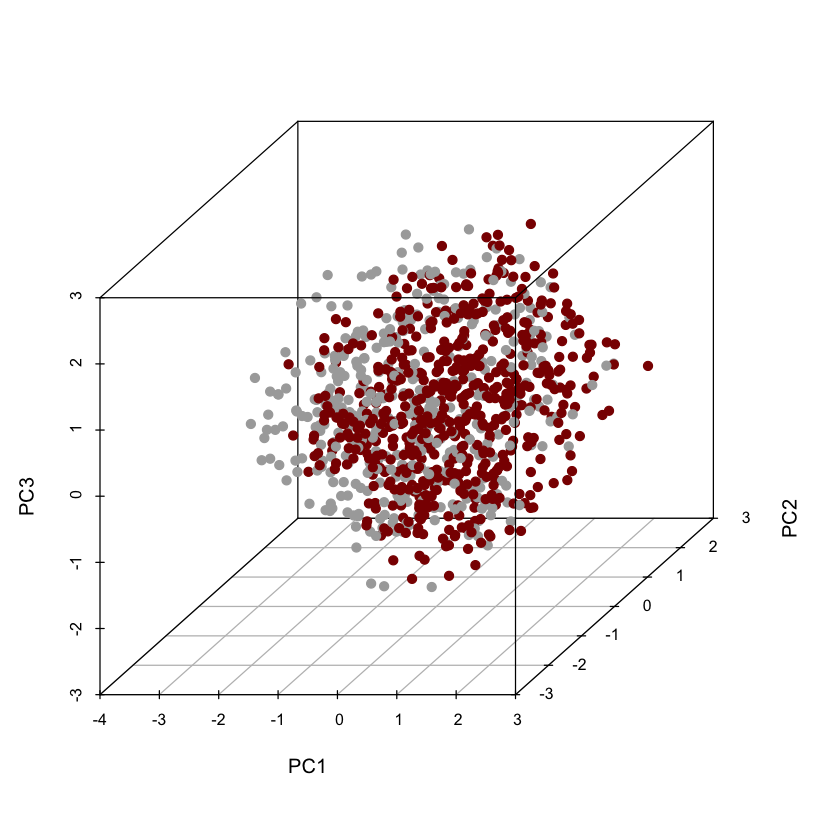

In [22]:
scatterplot3d(data_pca$x[,1:3], color=coltable[data$target],pch=19)

## Clustering
Clustering techniques look for patterns in the data space: i.e. groups of similiar observations that can naturally be separated from the others.

### Hierarchical Clustering


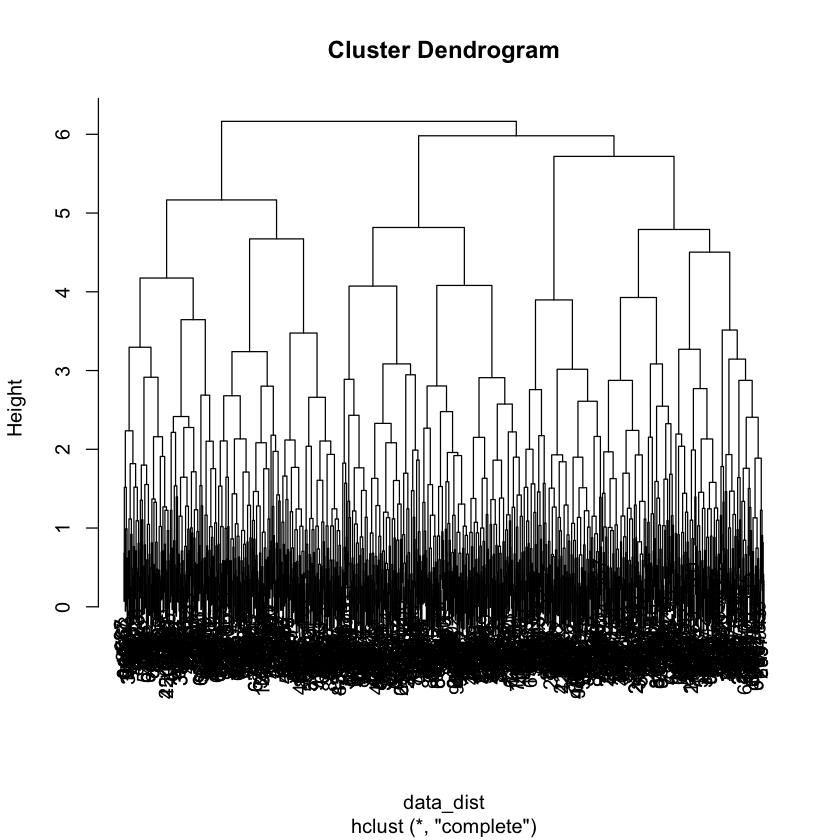

In [16]:
data_dist<-dist(data_sc)
data_hc<-hclust(data_dist)
plot(data_hc)

Appropriate cut: 3

In [17]:
clusters<-cutree(data_hc,3)
c1<-data[clusters==1,]
c2<-data[clusters==2,]
c3<-data[clusters==3,]
summary(c1)

      age          gender               chestpain     restingBP    
 Min.   :20.0   female: 37   typical angina  :109   Min.   : 94.0  
 1st Qu.:28.0   male  :304   atypical angina : 96   1st Qu.:141.0  
 Median :38.0                non-anginal pain:121   Median :164.0  
 Mean   :41.1                asymptomatic    : 15   Mean   :162.4  
 3rd Qu.:50.0                                       3rd Qu.:186.0  
 Max.   :80.0                                       Max.   :200.0  
                restingrelectro  maxheartrate      oldpeak        target   
 normal                 :146    Min.   : 95.0   Min.   :0.000   no HD: 85  
 ST-T wave abnormality  :115    1st Qu.:143.0   1st Qu.:2.900   HD   :256  
 ventricular hypertrophy: 80    Median :167.0   Median :4.300              
                                Mean   :162.1   Mean   :3.954              
                                3rd Qu.:183.0   3rd Qu.:5.300              
                                Max.   :202.0   Max.   :6.200       

In [25]:
summary(c2)

      age           gender               chestpain     restingBP    
 Min.   :20.00   female:119   typical angina  :186   Min.   : 94.0  
 1st Qu.:31.75   male  :257   atypical angina : 83   1st Qu.:126.0  
 Median :45.00                non-anginal pain: 92   Median :139.0  
 Mean   :47.51                asymptomatic    : 15   Mean   :147.7  
 3rd Qu.:63.25                                       3rd Qu.:182.2  
 Max.   :80.00                                       Max.   :200.0  
                restingrelectro  maxheartrate       oldpeak        target   
 normal                 :188    Min.   : 71.00   Min.   :0.000   no HD:211  
 ST-T wave abnormality  :125    1st Qu.: 97.75   1st Qu.:1.100   HD   :165  
 ventricular hypertrophy: 63    Median :113.00   Median :2.100              
                                Mean   :113.85   Mean   :2.219              
                                3rd Qu.:132.00   3rd Qu.:3.125              
                                Max.   :168.00   Max.  

In [26]:
summary(c3)

      age           gender               chestpain     restingBP    
 Min.   :22.00   female: 79   typical angina  :125   Min.   : 94.0  
 1st Qu.:53.00   male  :204   atypical angina : 45   1st Qu.:126.0  
 Median :62.00                non-anginal pain: 99   Median :138.0  
 Mean   :61.35                asymptomatic    : 14   Mean   :144.2  
 3rd Qu.:72.00                                       3rd Qu.:163.0  
 Max.   :80.00                                       Max.   :200.0  
                restingrelectro  maxheartrate      oldpeak        target   
 normal                 :120    Min.   :110.0   Min.   :0.000   no HD:124  
 ST-T wave abnormality  :104    1st Qu.:149.0   1st Qu.:0.850   HD   :159  
 ventricular hypertrophy: 59    Median :170.0   Median :1.800              
                                Mean   :167.5   Mean   :1.854              
                                3rd Qu.:186.0   3rd Qu.:2.600              
                                Max.   :202.0   Max.   :5.600

Scattering each attribute pair and coloring according to the clusters found with the hierarchical clustering algorithm:

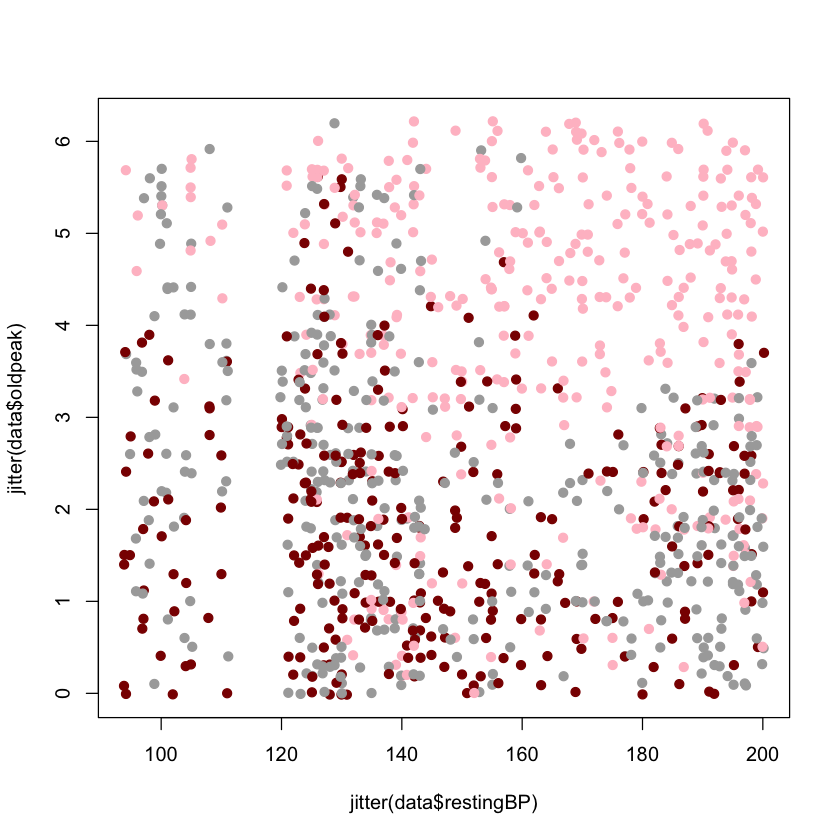

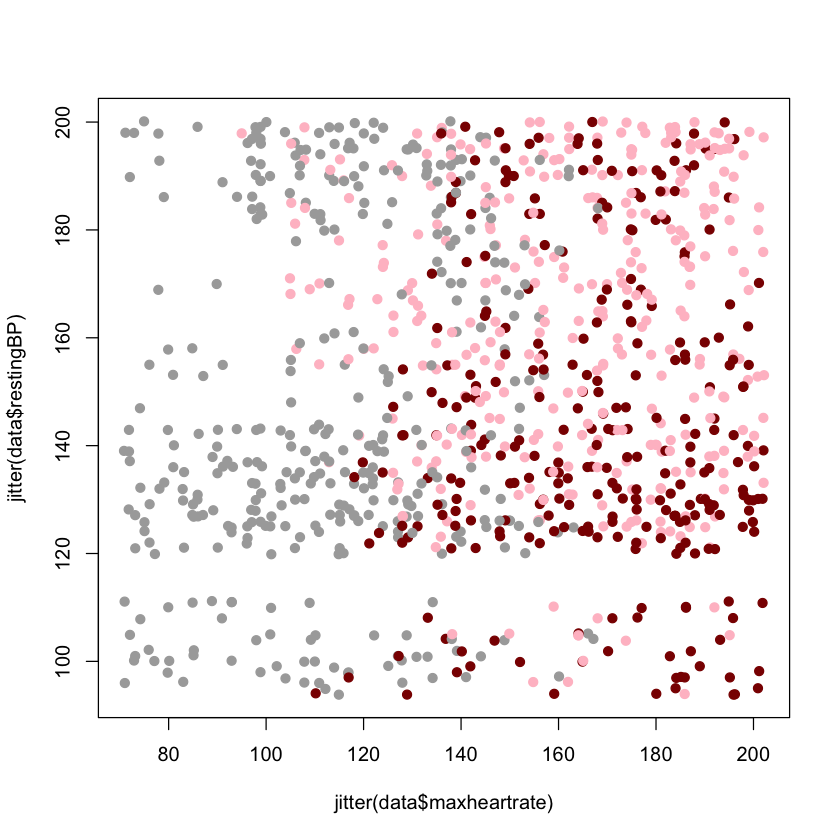

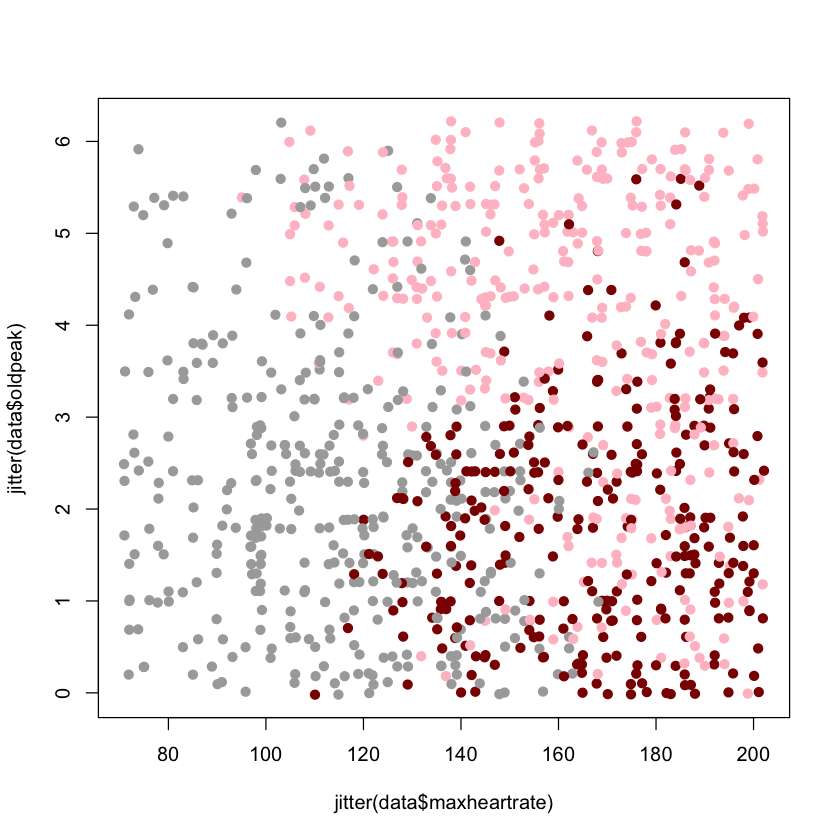

In [27]:
coltable2<-c('pink','darkgrey','darkred')
plot(jitter(data$restingBP),jitter(data$oldpeak), col=coltable2[clusters],pch=19)
plot(jitter(data$maxheartrate),jitter(data$restingBP), col=coltable2[clusters],pch=19)
plot(jitter(data$maxheartrate),jitter(data$oldpeak), col=coltable2[clusters],pch=19)

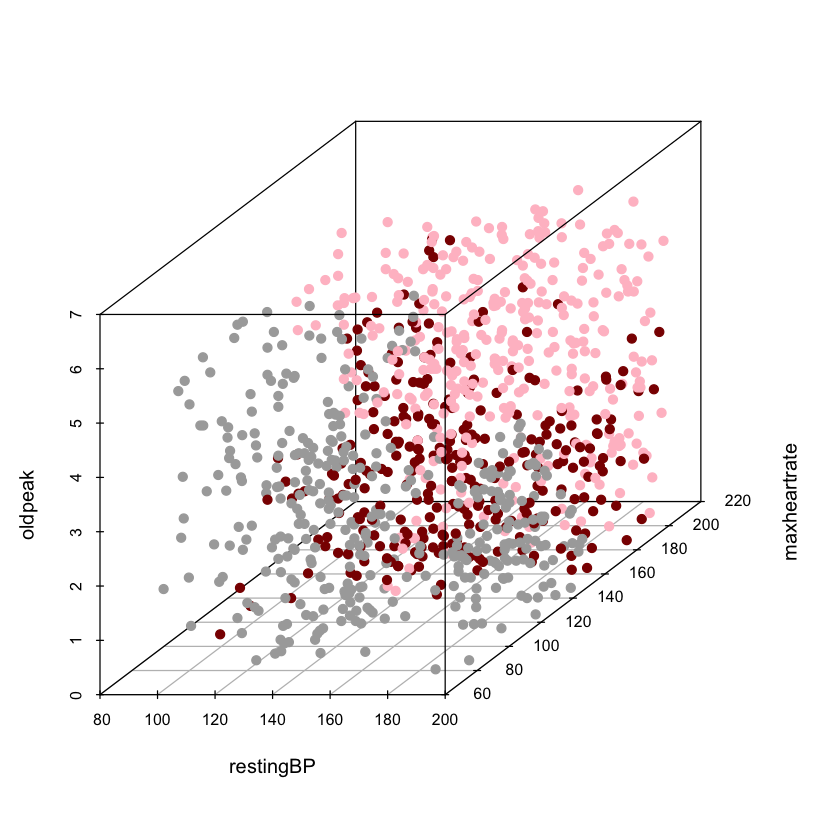

In [28]:
scatterplot3d(data[,c(4,6,7)],color=coltable2[clusters],pch=19)

4 clusters:

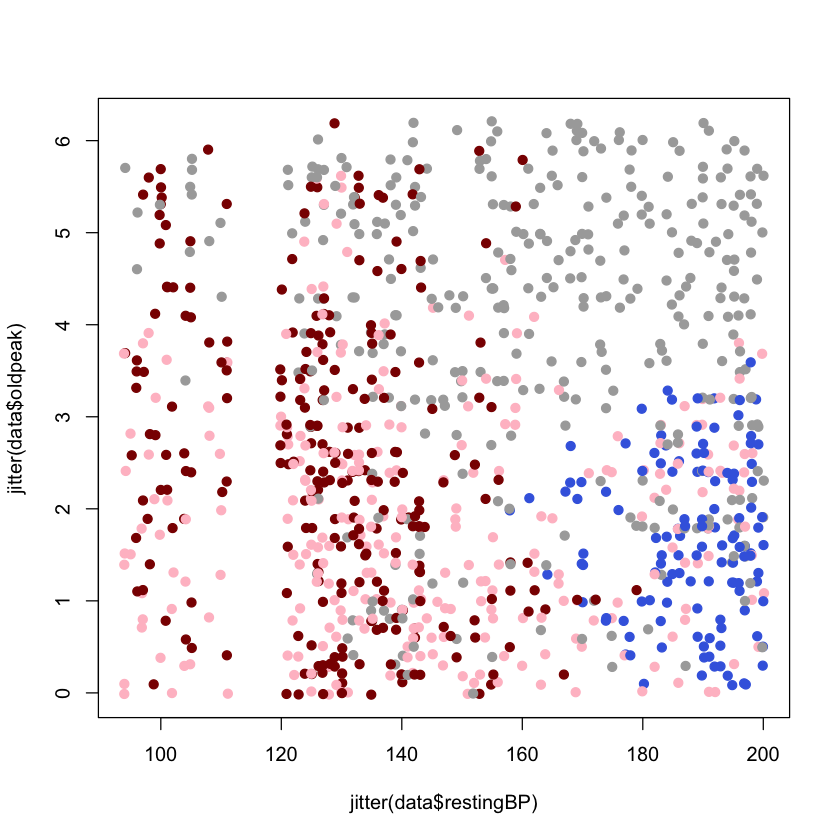

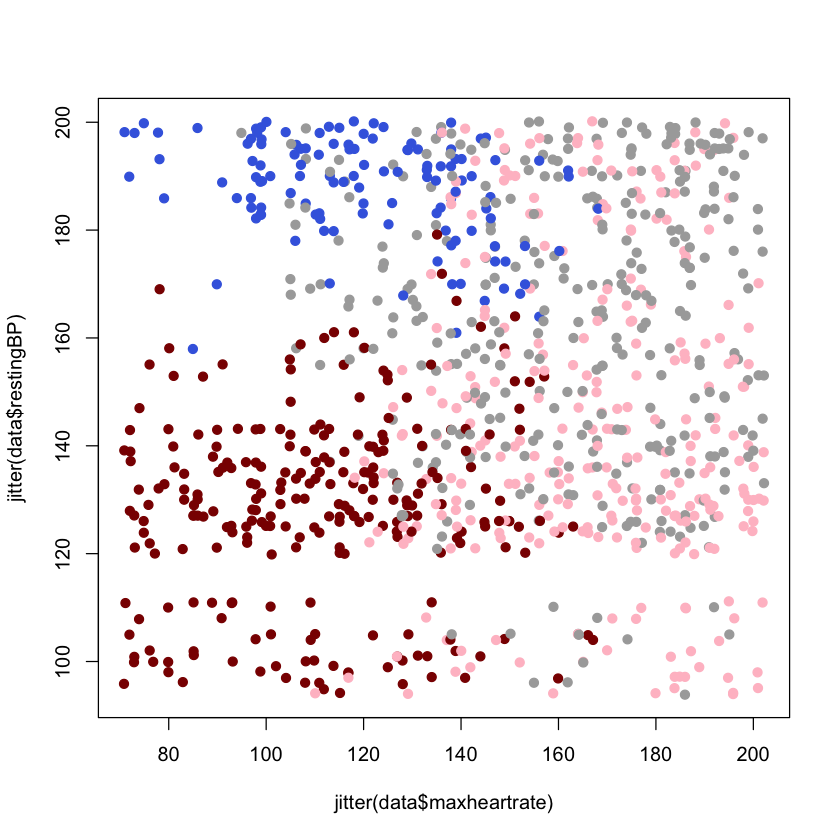

ERROR: Error in scatterplot3d(data[, c(4, 6, 7)], color = coltable2[clusters], : non trovo la funzione "scatterplot3d"


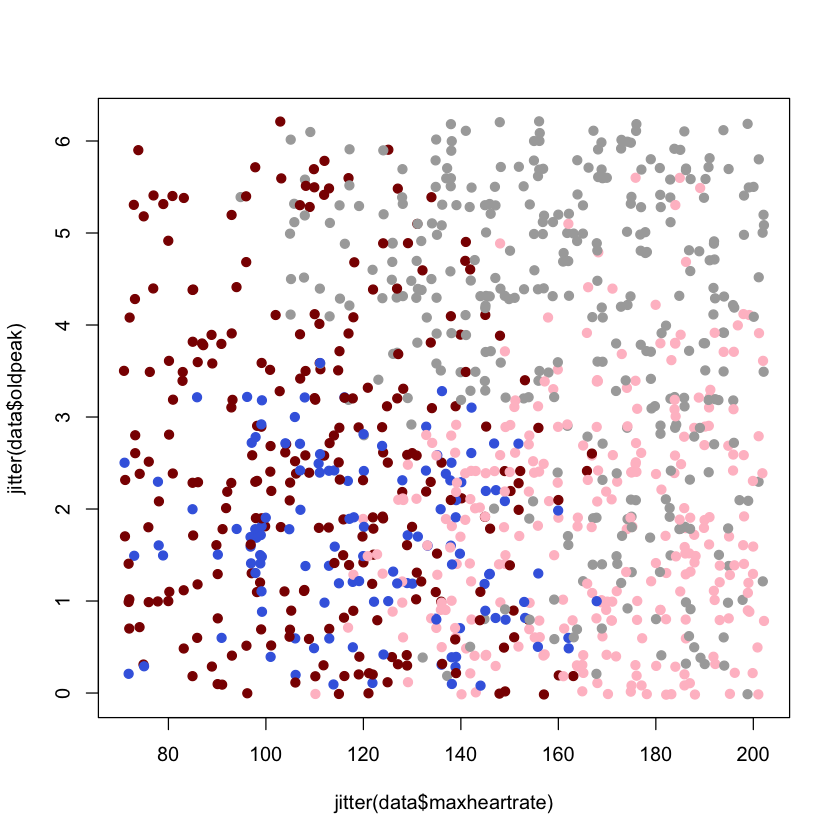

In [18]:
coltable2<-c('darkgrey','darkred','pink','royalblue')
clusters<-cutree(data_hc,4)
c1<-data[clusters==1,]
c2<-data[clusters==2,]
c3<-data[clusters==3,]
c4<-data[clusters==4,]
plot(jitter(data$restingBP),jitter(data$oldpeak), col=coltable2[clusters],pch=19)
plot(jitter(data$maxheartrate),jitter(data$restingBP), col=coltable2[clusters],pch=19)
plot(jitter(data$maxheartrate),jitter(data$oldpeak), col=coltable2[clusters],pch=19)
scatterplot3d(data[,c(4,6,7)],color=coltable2[clusters],pch=19)

### Prototype-based Clustering
This clustering technique may be more suitable for this dataset, since Hierarchical Clustering may fail to recognize pattern when the sample is too extendend.

* **K-means model**

In K-means model prototypes share the same space as the data and membership degrees are binary. This method should lead to compact clusters since it minimize an objective function of the variance of all clusters.

In [19]:
km4<-kmeans(data_sc, 4)
km4

K-means clustering with 4 clusters of sizes 244, 228, 258, 270

Cluster means:
          age   restingBP maxheartrate    oldpeak
1  0.91602600  0.61037030 -0.003282978 -0.5765651
2 -0.05282780 -0.85425270 -1.149238992 -0.1879929
3 -0.79786416  0.05423263  0.664989760 -0.5946256
4 -0.02080242  0.11795276  0.338000663  1.2479914

Clustering vector:
   [1] 4 2 4 4 4 4 1 4 2 1 1 1 3 2 4 4 2 1 1 2 4 4 2 1 4 4 3 4 2 1 3 2 1 3 3 4 1
  [38] 4 2 2 4 4 3 4 3 2 4 4 3 2 2 4 4 3 1 1 3 1 4 2 1 1 2 4 1 3 1 1 1 2 4 1 1 2
  [75] 4 4 4 4 3 4 3 4 3 4 2 1 1 3 3 1 1 4 2 3 3 1 4 2 4 4 3 3 1 3 3 1 4 2 4 3 3
 [112] 4 3 2 2 1 4 1 2 2 4 2 2 1 4 4 1 2 1 4 1 2 1 2 1 3 3 4 4 2 3 1 3 1 3 4 4 3
 [149] 2 4 3 3 4 4 1 4 1 1 2 1 2 4 3 3 4 2 3 3 1 1 3 2 1 2 4 4 4 4 2 1 1 1 4 1 2
 [186] 1 3 3 1 4 4 1 3 4 2 2 1 1 3 1 1 3 3 1 2 3 3 1 3 1 3 4 3 1 4 1 2 1 2 3 3 4
 [223] 3 4 2 1 4 1 2 3 3 3 2 3 3 2 2 2 4 4 2 4 1 3 2 1 1 2 3 4 2 3 4 3 3 4 4 4 2
 [260] 4 3 3 4 3 3 1 1 1 1 1 2 3 1 3 1 3 3 4 1 3 4 4 4 2 3 3 3 2 2 1 4 4 1 1 2 1
 [2

In [20]:
aggregate(data[, c(4,6,7)], by=list(km4$cluster), FUN=mean)

Group.1 restingBP maxheartrate oldpeak 
1 1       170.0369  145.3648     1.715574
2 2       126.1491  106.1842     2.384211
3 3       153.3721  168.2132     1.684496
4 4       155.2815  157.0333     4.855185

In [21]:
install.packages('fpc')
library('fpc')
cluster.stats(data_dist, km4$cluster)


I pacchetti binari scaricati sono in
	/var/folders/cl/2n2m21_9053fvwntblb1fmwm0000gn/T//Rtmpf7j5Ag/downloaded_packages


Warning message:
“il pacchetto ‘fpc’ è stato creato con R versione 4.2.3”


$n
[1] 1000

$cluster.number
[1] 4

$cluster.size
[1] 244 228 258 270

$min.cluster.size
[1] 228

$noisen
[1] 0

$diameter
[1] 4.700717 5.295506 4.795889 4.923679

$average.distance
[1] 1.939868 2.092890 1.969193 2.096733

$median.distance
[1] 1.902893 2.049789 1.930584 2.056647

$separation
[1] 0.2247705 0.1709336 0.1709336 0.2917212

$average.toother
[1] 2.857258 2.990564 2.850221 2.950843

$separation.matrix
          [,1]      [,2]      [,3]      [,4]
[1,] 0.0000000 0.2247705 0.2869092 0.3819477
[2,] 0.2247705 0.0000000 0.1709336 0.2917212
[3,] 0.2869092 0.1709336 0.0000000 0.3190929
[4,] 0.3819477 0.2917212 0.3190929 0.0000000

$ave.between.matrix
         [,1]     [,2]     [,3]     [,4]
[1,] 0.000000 2.916308 2.731580 2.927487
[2,] 2.916308 0.000000 2.967117 3.080075
[3,] 2.731580 2.967117 0.000000 2.858726
[4,] 2.927487 3.080075 2.858726 0.000000

$average.between
[1] 2.911413

$average.within
[1] 2.024676

$n.between
[1] 374508

$n.within
[1] 124992

$max.diameter
[1] 5.295506

$min.separation
[1] 0.1709336

$within.cluster.ss
[1] 2317.482

$clus.avg.silwidths
        1         2         3         4 
0.2242072 0.1866420 0.2073052 0.1846067 

$avg.silwidth
[1] 0.2005895

$g2
NULL

$g3
NULL

$pearsongamma
[1] 0.4386885

$dunn
[1] 0.03227898

$dunn2
[1] 1.302779

$entropy
[1] 1.384318

$wb.ratio
[1] 0.6954275

$ch
[1] 240.4628

$cwidegap
[1] 0.8865101 1.1386530 1.0239928 0.9924928

$widestgap
[1] 1.138653

$sindex
[1] 0.3826202

$corrected.rand
NULL

$vi
NULL

In [22]:
library('cluster')
km4.s<-silhouette(km4$cluster, data_dist)
aggregate(km4.s[,3], by=list(km4.s[,1]), FUN=mean )

Warning message:
“il pacchetto ‘cluster’ è stato creato con R versione 4.2.3”


Group.1 x        
1 1       0.2242072
2 2       0.1866420
3 3       0.2073052
4 4       0.1846067

In [23]:
library('dbscan')


Caricamento pacchetto: ‘dbscan’


Il seguente oggetto è mascherato da ‘package:fpc’:

    dbscan


Il seguente oggetto è mascherato da ‘package:stats’:

    as.dendrogram




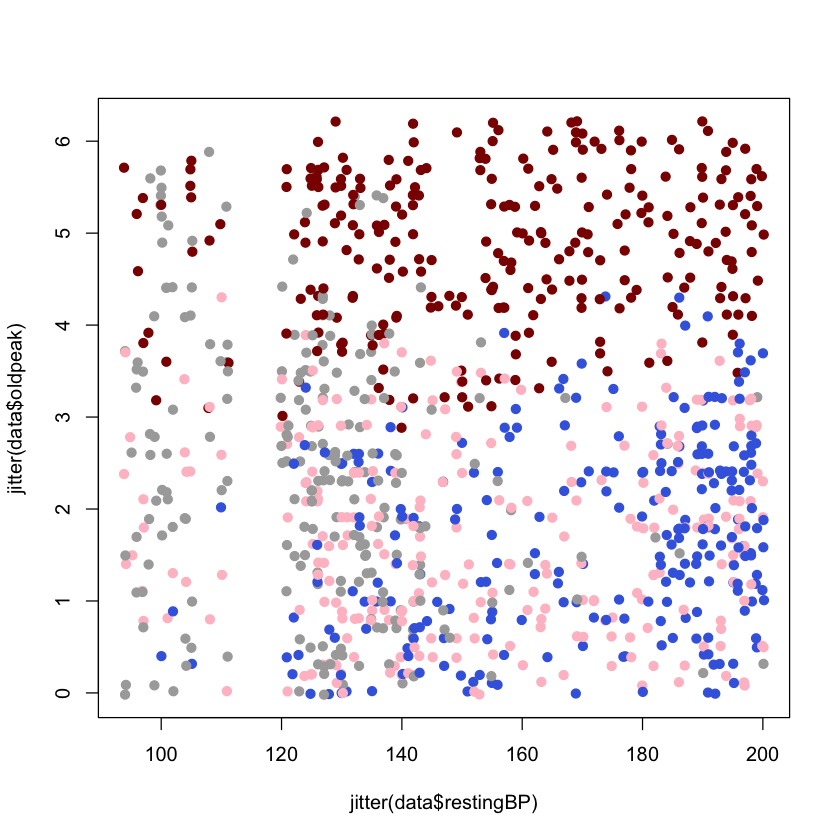

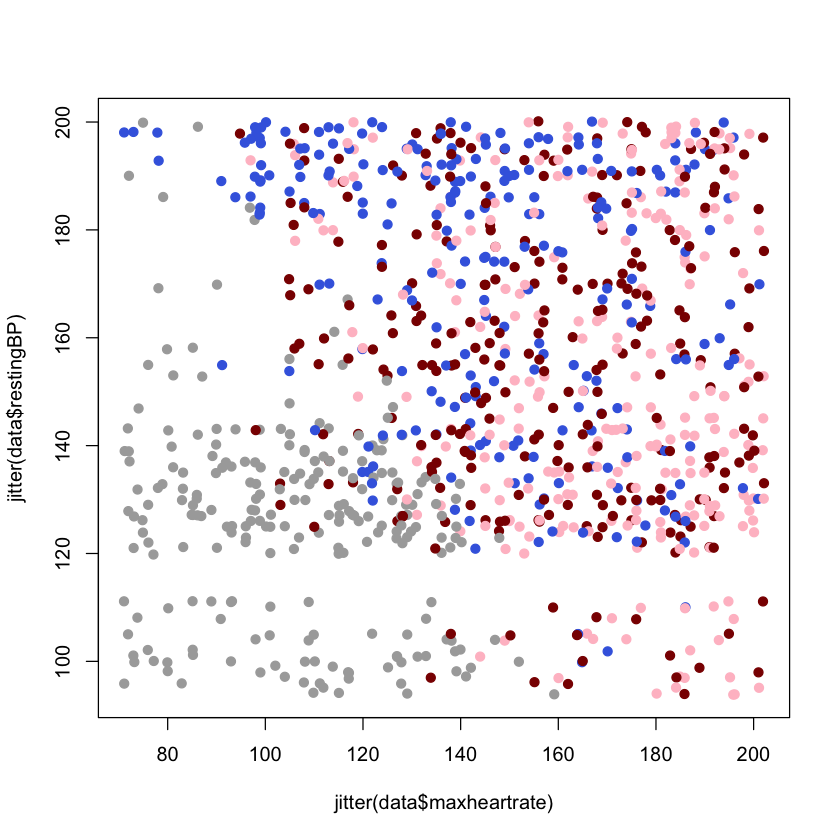

ERROR: Error in scatterplot3d(data[, c(4, 6, 7)], color = coltable3[km4$cluster], : non trovo la funzione "scatterplot3d"


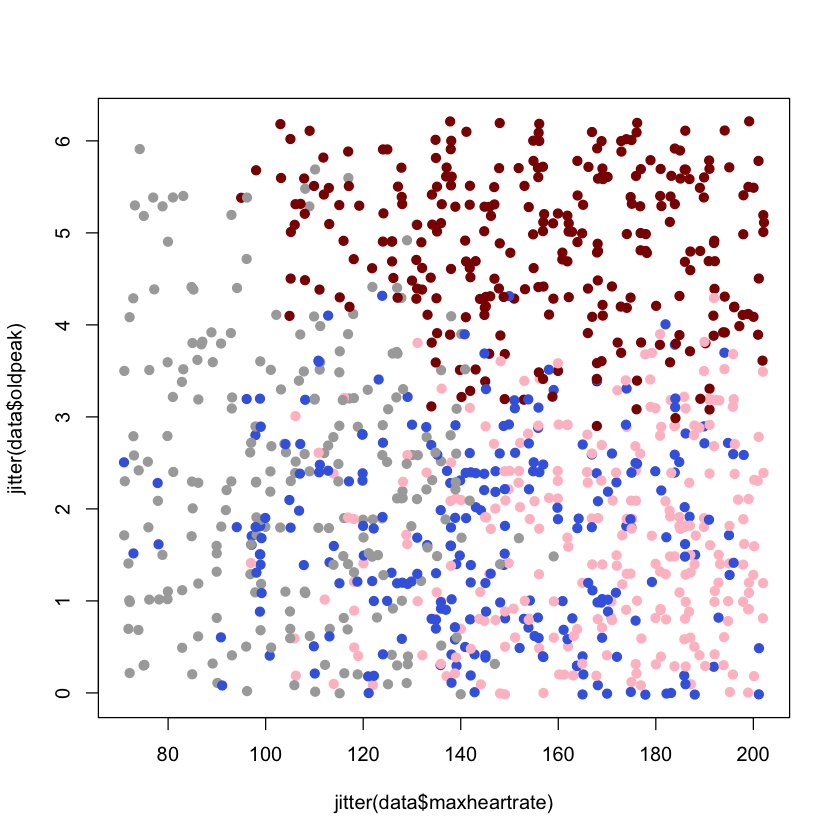

In [24]:
coltable3<-c('royalblue','darkgrey','pink','darkred')
plot(jitter(data$restingBP),jitter(data$oldpeak), col=coltable3[km4$cluster],pch=19)
plot(jitter(data$maxheartrate),jitter(data$restingBP), col=coltable3[km4$cluster],pch=19)
plot(jitter(data$maxheartrate),jitter(data$oldpeak), col=coltable3[km4$cluster],pch=19)
scatterplot3d(data[,c(4,6,7)],color=coltable3[km4$cluster],pch=19)

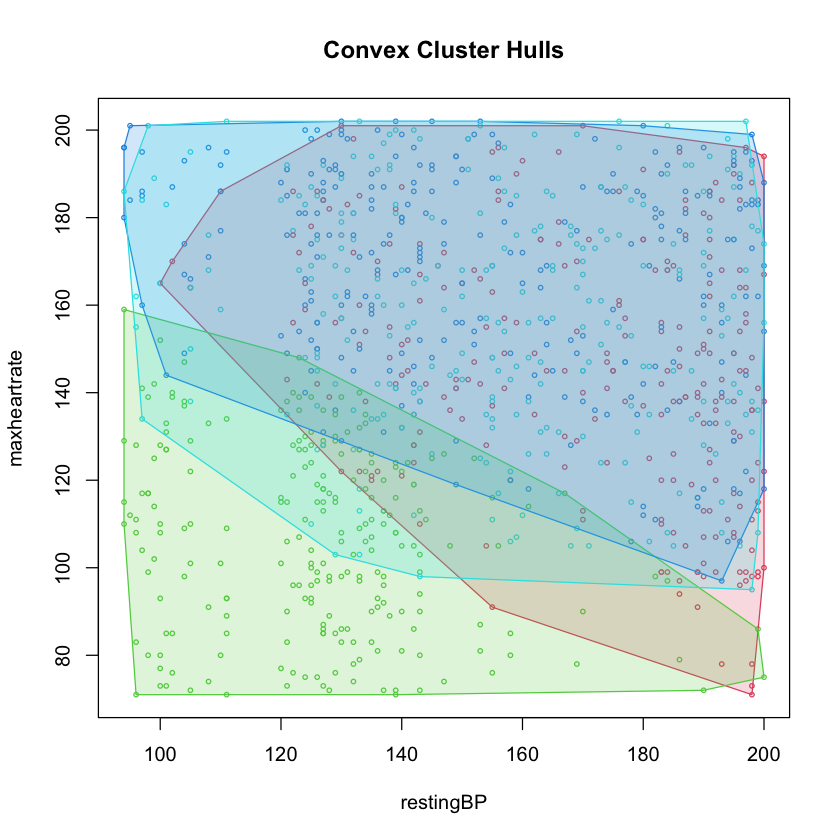

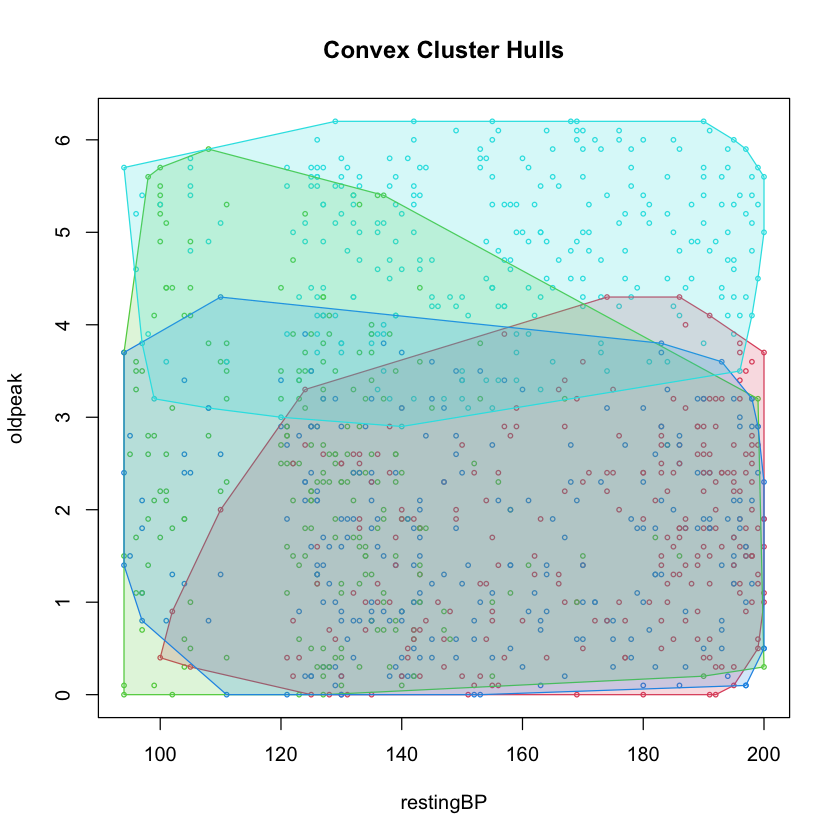

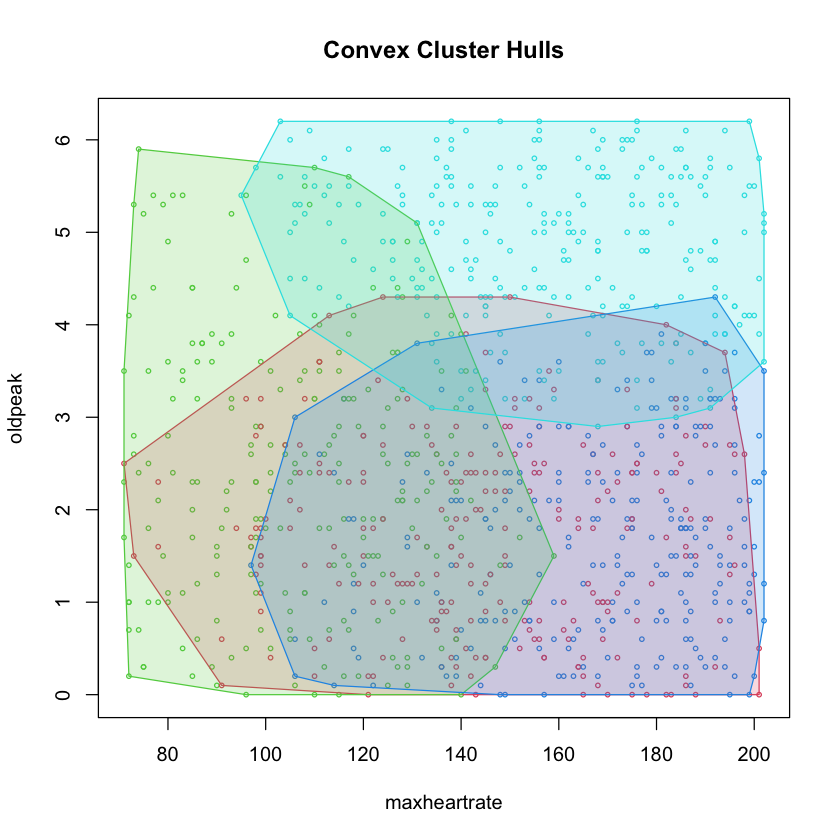

In [25]:
hullplot(data[,c(4,6)],km4$cluster)
hullplot(data[,c(4,7)],km4$cluster)
hullplot(data[,c(6,7)],km4$cluster)

* **C-means Model**

Fuzzy c-means model may be more effective in the presence of borderline points, as it smooths the membership degrees using fuzzy logic, allowing to identify those data points close to a prototype associated to it by accident.

In [26]:
install.packages("ppclust")
library(ppclust)
install.packages("factoextra")
library(factoextra)
install.packages("cluster")
library(cluster)
install.packages("fclust")
library(fclust)


I pacchetti binari scaricati sono in
	/var/folders/cl/2n2m21_9053fvwntblb1fmwm0000gn/T//Rtmpf7j5Ag/downloaded_packages


Warning message:
“il pacchetto ‘ppclust’ è stato creato con R versione 4.2.3”

Caricamento pacchetto: ‘ppclust’


Il seguente oggetto è mascherato da ‘package:fpc’:

    plotcluster





I pacchetti binari scaricati sono in
	/var/folders/cl/2n2m21_9053fvwntblb1fmwm0000gn/T//Rtmpf7j5Ag/downloaded_packages


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa




I pacchetti binari scaricati sono in
	/var/folders/cl/2n2m21_9053fvwntblb1fmwm0000gn/T//Rtmpf7j5Ag/downloaded_packages

I pacchetti binari scaricati sono in
	/var/folders/cl/2n2m21_9053fvwntblb1fmwm0000gn/T//Rtmpf7j5Ag/downloaded_packages


In [27]:
x<-data[,c(4,6,7)]
res.fcm <- fcm(x, centers=3)
res.fcm$v0
res.fcm$v

restingBP maxheartrate oldpeak
Cluster 1 200       100          1.9    
Cluster 2 147       172          2.3    
Cluster 3 124        75          5.2

restingBP maxheartrate oldpeak 
Cluster 1 182.3991  148.5718     2.763059
Cluster 2 136.5678  175.4093     2.666452
Cluster 3 131.9721  109.7272     2.609430

In [28]:
summary(res.fcm)

Summary for 'res.fcm'

Number of data objects:  1000 

Number of clusters:  3 

Crisp clustering vector:
   [1] 1 3 2 2 1 1 2 2 3 1 1 1 2 3 1 1 3 1 1 3 1 1 3 2 1 2 1 2 3 1 2 1 1 2 1 3 1
  [38] 1 3 3 1 2 1 2 1 3 2 1 3 3 3 1 2 1 1 1 2 2 1 3 1 1 3 3 2 2 1 2 2 3 1 1 2 3
  [75] 3 1 1 2 2 1 2 3 2 2 3 1 2 2 2 1 2 1 3 2 2 1 2 3 2 1 1 2 2 1 1 2 3 3 2 2 1
 [112] 2 2 3 3 3 2 2 3 1 1 3 3 2 2 3 3 3 1 2 1 3 2 3 3 2 1 1 3 3 2 3 1 2 1 1 2 2
 [149] 3 3 1 1 1 2 1 2 2 1 3 1 3 3 2 1 1 3 3 1 1 1 2 3 1 3 2 1 1 2 3 2 2 1 1 1 3
 [186] 1 2 2 1 1 1 1 1 2 3 3 2 1 2 1 1 2 1 1 3 2 2 1 2 1 1 1 1 2 1 1 1 2 3 2 1 1
 [223] 1 1 3 1 1 2 3 1 2 2 3 2 3 3 3 3 2 3 3 2 2 2 3 3 1 3 1 2 3 1 2 2 2 1 1 2 3
 [260] 3 1 1 2 2 1 1 1 1 1 2 3 2 1 2 1 2 2 2 2 1 2 2 2 3 1 2 1 3 3 3 1 2 3 1 3 2
 [297] 3 2 2 3 1 1 1 3 2 1 1 2 1 1 2 1 3 3 3 1 3 1 3 1 1 2 1 1 2 1 3 1 3 1 1 3 3
 [334] 2 3 1 1 2 1 2 3 1 1 1 1 1 1 2 2 3 3 1 3 1 3 3 2 2 1 2 3 1 3 2 1 1 3 2 2 1
 [371] 3 2 1 3 3 1 1 2 1 1 3 1 3 1 1 2 2 1 1 3 3 2 3 3 2 2 2 3 3 2 2 2 2 3 1 3 3
 [40

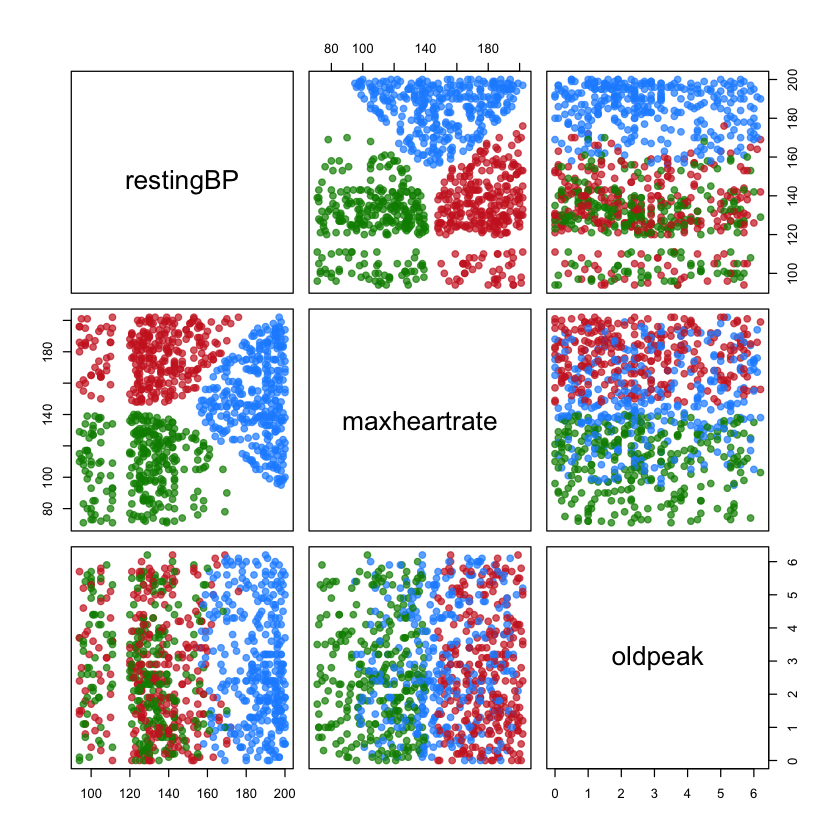

In [29]:
plotcluster(res.fcm, cp=1, trans=TRUE)

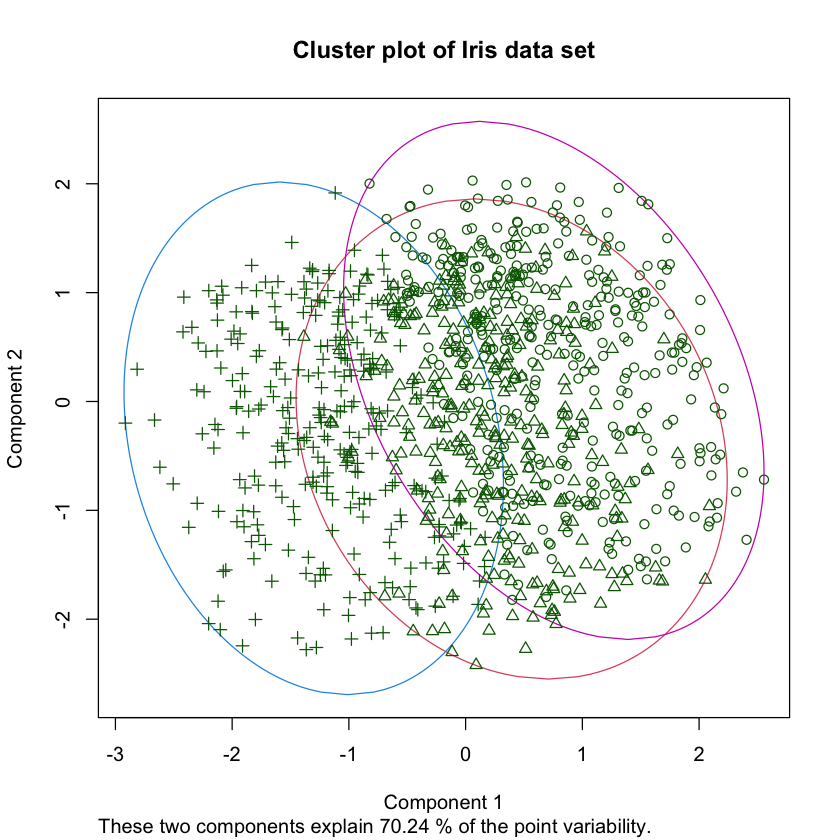

In [30]:
res.fcm3 <- ppclust2(res.fcm, "fanny")

cluster::clusplot(scale(x), res.fcm3$cluster,  
  main = "Cluster plot of Iris data set",
  color=TRUE, lines = 2, cex=1)

In [31]:
res.fcm4 <- ppclust2(res.fcm, "fclust")
idxsf <- SIL.F(res.fcm4$Xca, res.fcm4$U, alpha=1)
idxpe <- PE(res.fcm4$U)
idxpc <- PC(res.fcm4$U)
idxmpc <- MPC(res.fcm4$U)
cat("Partition Entropy: ", idxpe)
cat(", Fuzzy Silhouette Index: ", idxsf)

Partition Entropy:  0.6558189, Fuzzy Silhouette Index:  0.6826779

## Association Rules
Association rules exploit the structure of the pattern space to guide the search and the property that a pattern cannot occur more frequently than its sub patterns.

In [32]:
install.packages('arules')


I pacchetti binari scaricati sono in
	/var/folders/cl/2n2m21_9053fvwntblb1fmwm0000gn/T//Rtmpf7j5Ag/downloaded_packages


In [33]:
library(arules)
library(arulesViz)

Warning message:
“il pacchetto ‘arules’ è stato creato con R versione 4.2.3”
Caricamento del pacchetto richiesto: Matrix


Caricamento pacchetto: ‘Matrix’


I seguenti oggetti sono mascherati da ‘package:tidyr’:

    expand, pack, unpack



Caricamento pacchetto: ‘arules’


Il seguente oggetto è mascherato da ‘package:dplyr’:

    recode


I seguenti oggetti sono mascherati da ‘package:base’:

    abbreviate, write




In [34]:
rules = apriori(transactions(data[,c(2,3,5,8)]), supp=0.001, conf=0.5)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[11 item(s), 1000 transaction(s)] done [0.00s].
sorting and recoding items ... [11 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [157 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.

Warning message:
“Unknown control parameters: measures”


Available control parameters (with default values):
main	 =  Scatter plot for 157 rules
colors	 =  c("#EE0000FF", "#EEEEEEFF")
jitter	 =  NA
engine	 =  ggplot2
verbose	 =  FALSE


To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



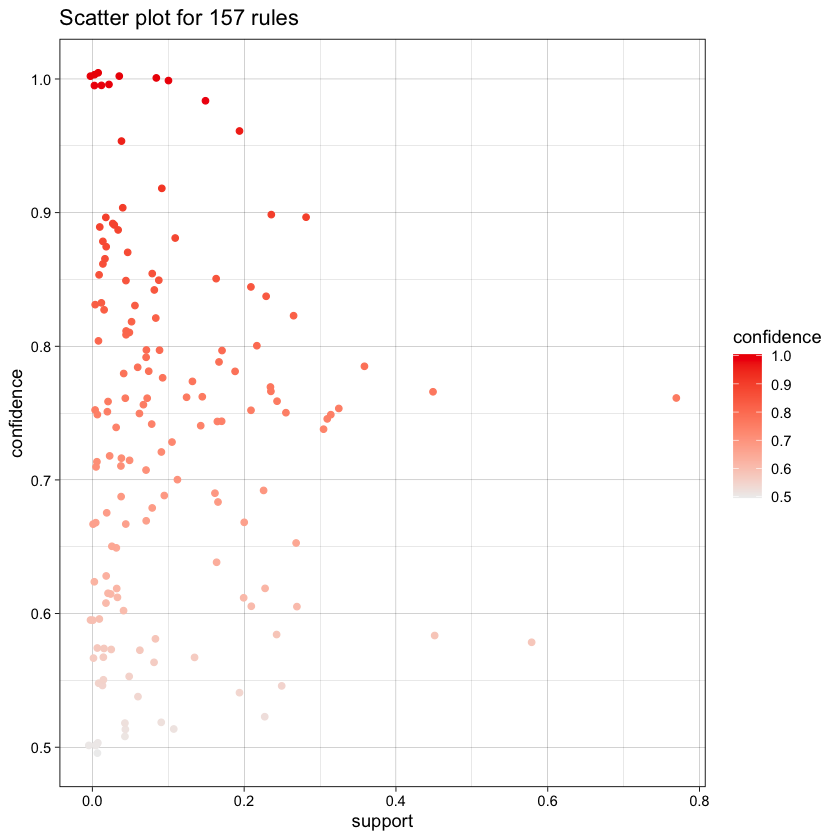

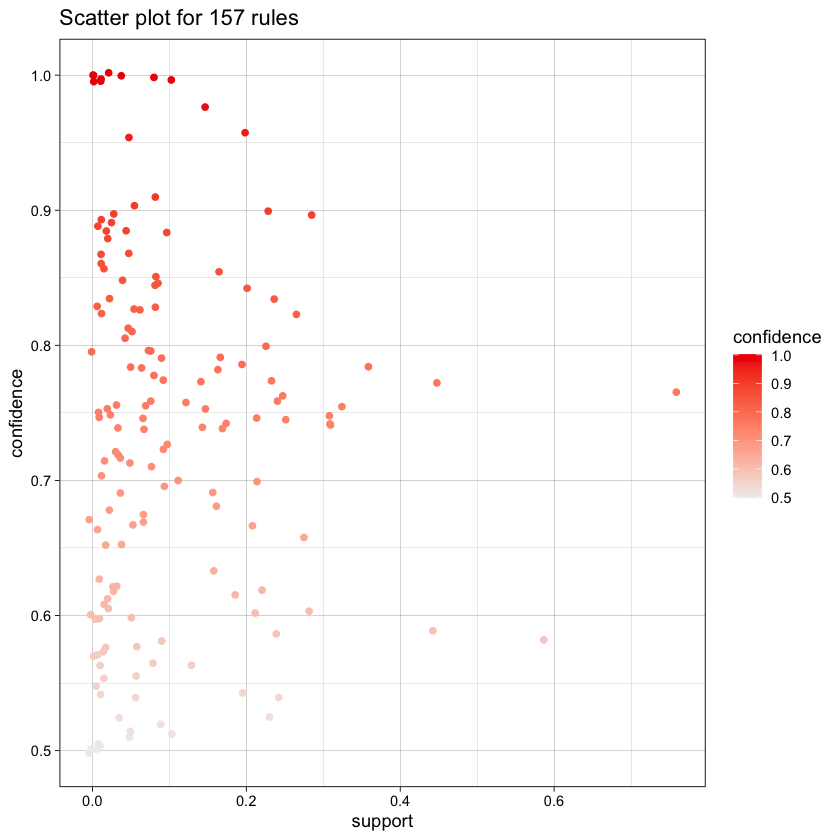

In [35]:
plot(rules,shadin='confidence')
plot(rules, measures=c('support', 'lift'), shading = 'confidence')

Warning message:
“Too many rules supplied. Only plotting the best 10 using ‘lift’ (change control parameter max if needed).”


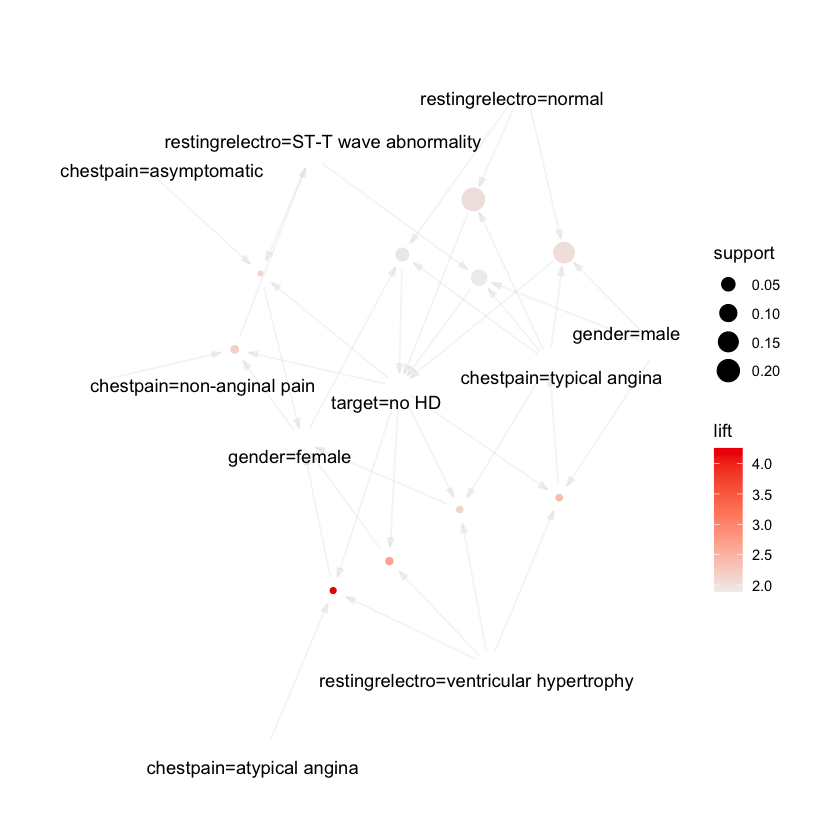

In [36]:
plot(rules, method='graph', max=10)

### Decision Tree

In [37]:
install.packages('rpart')
install.packages('rpart.plot')
library('rpart')
library('rpart.plot')


I pacchetti binari scaricati sono in
	/var/folders/cl/2n2m21_9053fvwntblb1fmwm0000gn/T//Rtmpf7j5Ag/downloaded_packages

I pacchetti binari scaricati sono in
	/var/folders/cl/2n2m21_9053fvwntblb1fmwm0000gn/T//Rtmpf7j5Ag/downloaded_packages


Warning message:
“il pacchetto ‘rpart’ è stato creato con R versione 4.2.3”


In [38]:
nr<-nrow(data)
ntrain<-as.integer(nr*0.8) 
data.idx<-sample(nr, ntrain)
data.train = data[data.idx,] 
data.test = data[-data.idx,]

In [39]:
head(data.train)

age gender chestpain        restingBP restingrelectro         maxheartrate
984 28  female atypical angina  193       normal                   97         
968 80  male   atypical angina  199       ST-T wave abnormality   113         
367 63  female typical angina   126       normal                   75         
616 44  female typical angina   129       normal                  187         
356 75  male   atypical angina  171       ventricular hypertrophy 105         
957 43  male   non-anginal pain 135       normal                  182         
    oldpeak target
984 1.4     HD    
968 0.6     HD    
367 0.3     no HD 
616 0.1     no HD 
356 5.0     HD    
957 0.8     HD

In [40]:
head(data.test)

age gender chestpain        restingBP restingrelectro       maxheartrate
3  49  male   non-anginal pain 133       normal                202         
4  43  male   typical angina   138       ST-T wave abnormality 153         
8  52  male   typical angina   127       normal                192         
10 61  female typical angina   190       ST-T wave abnormality 150         
16 32  male   non-anginal pain 188       normal                134         
17 42  female asymptomatic     137       ST-T wave abnormality 110         
   oldpeak target
3  5.0     no HD 
4  3.2     HD    
8  4.9     no HD 
10 2.9     HD    
16 4.5     HD    
17 3.2     HD

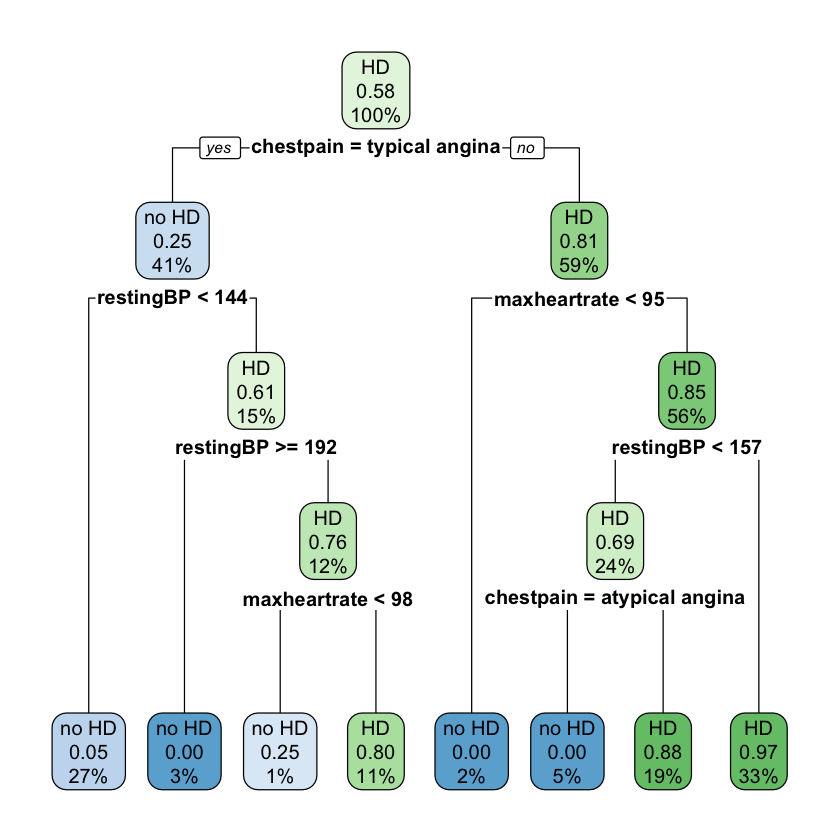

In [41]:
rpart.data.train<-rpart(target~., data.train)
rpart.plot(rpart.data.train)

In [42]:
data.pred = predict(rpart.data.train, data.test, type='class')
table(data.test$target, data.pred)

       data.pred
        no HD  HD
  no HD    74  11
  HD        6 109

In [43]:
#Overall accuracy:
cm = table(data.test$target, data.pred)
(cm[1,1]+cm[2,2])/sum(cm)
#Missing results:
nrow(data.test) - sum(cm)

[1] 0.915

[1] 0

## Naive Bayer Classifier


In [44]:
install.packages("e1071")
install.packages("caTools")
install.packages("caret")


I pacchetti binari scaricati sono in
	/var/folders/cl/2n2m21_9053fvwntblb1fmwm0000gn/T//Rtmpf7j5Ag/downloaded_packages

I pacchetti binari scaricati sono in
	/var/folders/cl/2n2m21_9053fvwntblb1fmwm0000gn/T//Rtmpf7j5Ag/downloaded_packages

I pacchetti binari scaricati sono in
	/var/folders/cl/2n2m21_9053fvwntblb1fmwm0000gn/T//Rtmpf7j5Ag/downloaded_packages


In [45]:
library(e1071)
library(caTools)
library(caret)

Warning message:
“il pacchetto ‘e1071’ è stato creato con R versione 4.2.3”
Registered S3 method overwritten by 'e1071':
  method       from  
  print.fclust fclust

Caricamento del pacchetto richiesto: lattice


Caricamento pacchetto: ‘caret’


Il seguente oggetto è mascherato da ‘package:purrr’:

    lift




In [46]:
head(data.train)

age gender chestpain        restingBP restingrelectro         maxheartrate
984 28  female atypical angina  193       normal                   97         
968 80  male   atypical angina  199       ST-T wave abnormality   113         
367 63  female typical angina   126       normal                   75         
616 44  female typical angina   129       normal                  187         
356 75  male   atypical angina  171       ventricular hypertrophy 105         
957 43  male   non-anginal pain 135       normal                  182         
    oldpeak target
984 1.4     HD    
968 0.6     HD    
367 0.3     no HD 
616 0.1     no HD 
356 5.0     HD    
957 0.8     HD

In [47]:
train_scale <- scale(data.train[, c(1,4,6,7)])
test_scale <- scale(data.test[, c(1,4,6,7)])
set.seed(120)  # Setting Seed
classifier <- naiveBayes(target ~ ., data = data.train)
classifier


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
  no HD      HD 
0.41875 0.58125 

Conditional probabilities:
       age
Y           [,1]     [,2]
  no HD 48.57612 18.80118
  HD    49.01075 17.06194

       gender
Y          female      male
  no HD 0.2477612 0.7522388
  HD    0.2172043 0.7827957

       chestpain
Y       typical angina atypical angina non-anginal pain asymptomatic
  no HD     0.74029851      0.17014925       0.07761194   0.01194030
  HD        0.17634409      0.26666667       0.49247312   0.06451613

       restingBP
Y           [,1]     [,2]
  no HD 134.6537 26.93115
  HD    163.9183 26.44443

       restingrelectro
Y           normal ST-T wave abnormality ventricular hypertrophy
  no HD 0.64776119            0.33731343              0.01492537
  HD    0.32258065            0.33548387              0.34193548

       maxheartrate
Y           [,1]     [,2]
  no HD 137.9940 38.84423
  H

In [48]:
y_pred <- predict(classifier, newdata = data.test)
 
# Confusion Matrix
cm <- table(data.test$target, y_pred)
cm
 
# Model Evaluation
confusionMatrix(cm)

       y_pred
        no HD  HD
  no HD    71  14
  HD       15 100

Confusion Matrix and Statistics

       y_pred
        no HD  HD
  no HD    71  14
  HD       15 100
                                          
               Accuracy : 0.855           
                 95% CI : (0.7984, 0.9007)
    No Information Rate : 0.57            
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7038          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8256          
            Specificity : 0.8772          
         Pos Pred Value : 0.8353          
         Neg Pred Value : 0.8696          
             Prevalence : 0.4300          
         Detection Rate : 0.3550          
   Detection Prevalence : 0.4250          
      Balanced Accuracy : 0.8514          
                                          
       'Positive' Class : no HD           
                                       

# Predictive Analysis

## Logistic Regression
Model estimating the probability of an event occurring based on a dataset of indipendent variables.

In [49]:
install.packages("caTools") 
install.packages("ROCR")     


I pacchetti binari scaricati sono in
	/var/folders/cl/2n2m21_9053fvwntblb1fmwm0000gn/T//Rtmpf7j5Ag/downloaded_packages

I pacchetti binari scaricati sono in
	/var/folders/cl/2n2m21_9053fvwntblb1fmwm0000gn/T//Rtmpf7j5Ag/downloaded_packages


In [50]:
library(caTools)
library(ROCR)

In [51]:
# Training model
logistic_model <- glm(target ~ age + gender + chestpain + restingBP + maxheartrate + oldpeak,
                    data = data.train,
                    family = "binomial")
summary(logistic_model)


Call:
glm(formula = target ~ age + gender + chestpain + restingBP + 
    maxheartrate + oldpeak, family = "binomial", data = data.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0517  -0.5301   0.2213   0.5595   1.9922  

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -9.3956955  0.8792600 -10.686  < 2e-16 ***
age                       -0.0007098  0.0057348  -0.124    0.901    
gendermale                 0.1103194  0.2491995   0.443    0.658    
chestpainatypical angina   1.2061031  0.2526359   4.774 1.81e-06 ***
chestpainnon-anginal pain  3.4442830  0.2766824  12.449  < 2e-16 ***
chestpainasymptomatic      2.6237677  0.6070209   4.322 1.54e-05 ***
restingBP                  0.0415575  0.0039212  10.598  < 2e-16 ***
maxheartrate               0.0130711  0.0030597   4.272 1.94e-05 ***
oldpeak                    0.0922328  0.0639584   1.442    0.149    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01

In [52]:
logistic_model2 <- glm(target ~ chestpain + restingBP + maxheartrate,
                    data = data.train,
                    family = "binomial")
summary(logistic_model2)


Call:
glm(formula = target ~ chestpain + restingBP + maxheartrate, 
    family = "binomial", data = data.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1537  -0.5229   0.2305   0.5561   1.9191  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -9.118411   0.795839 -11.458  < 2e-16 ***
chestpainatypical angina   1.237214   0.252115   4.907 9.23e-07 ***
chestpainnon-anginal pain  3.476218   0.273906  12.691  < 2e-16 ***
chestpainasymptomatic      2.577016   0.597551   4.313 1.61e-05 ***
restingBP                  0.041378   0.003911  10.579  < 2e-16 ***
maxheartrate               0.013226   0.003044   4.345 1.39e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1087.82  on 799  degrees of freedom
Residual deviance:  617.17  on 794  degrees of freedom
AIC: 629.17

Number of Fisher Scoring iteratio

In [53]:
data.pred <- predict(logistic_model2,
                       data.test, type = "response")
data.pred <- ifelse(data.pred >0.5, 1, 0)

#Accuracy
cm<-table(data.test$target, data.pred)
cm
accuracy <- sum(diag(cm))/length(data.test$target)
sprintf("Accuracy: %.2f%%", accuracy*100)

       data.pred
         0  1
  no HD 70 15
  HD    18 97

[1] "Accuracy: 83.50%"

[1] 0.1664962

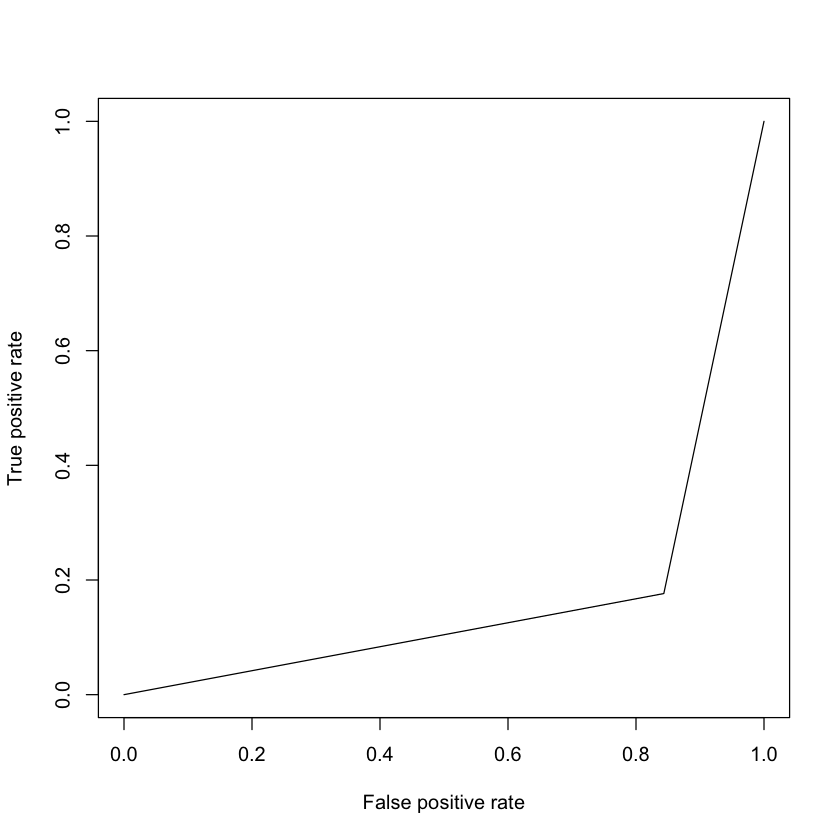

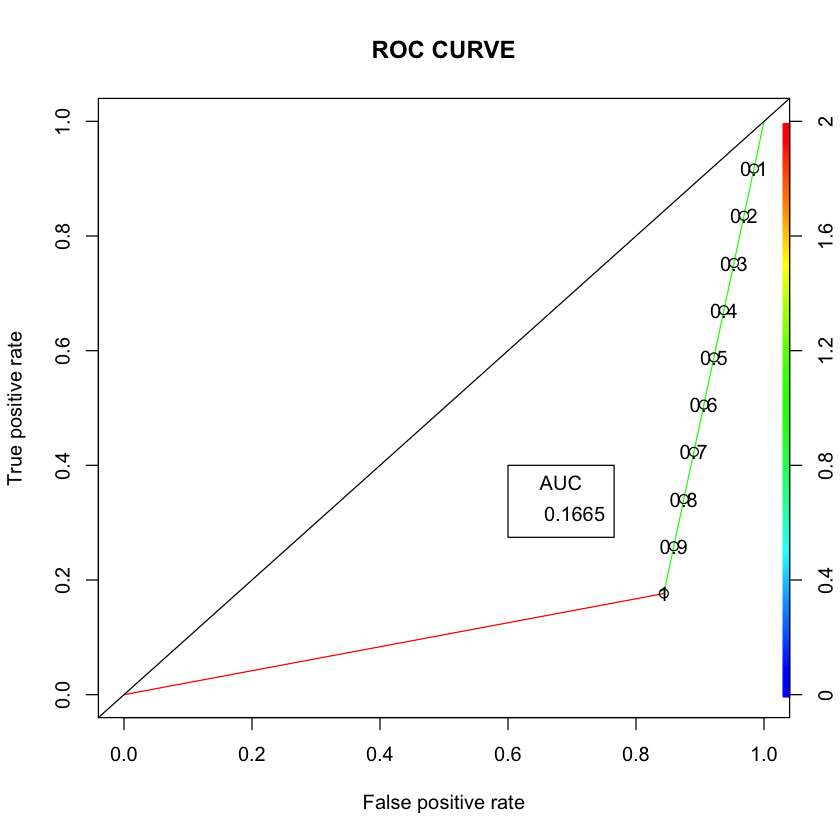

In [54]:
#ROC-AUC Curve
ROCPred <- prediction(data.pred, data.test$target)
ROCPer <- performance(ROCPred, measure = "tpr",
                      x.measure = "fpr")
 
auc <- performance(ROCPred, measure = "auc")
auc <- auc@y.values[[1]]
auc
 
#Plotting curve
plot(ROCPer)
plot(ROCPer, colorize = TRUE,
     print.cutoffs.at = seq(0.1, by = 0.1),
     main = "ROC CURVE")
abline(a = 0, b = 1)
 
auc <- round(auc, 4)
legend(.6, .4, auc, title = "AUC", cex = 1)

## K-Nearest Neighbors 
Nonparametric algorithm, figures out a label on any test point without searching for a predictor.

In [74]:
suppressPackageStartupMessages(library(tidyverse))
library(class)
test_pred <- knn(
                 train = train_scale, 
                 test = test_scale,
                 cl = data.train$target, 
                 k=5
                 )

#Accuracy
actual <- data.test$target
cm <- table(actual,test_pred)
cm
accuracy <- sum(diag(cm))/length(actual)
sprintf("Accuracy: %.2f%%", accuracy*100)

       test_pred
actual  no HD HD
  no HD    62 23
  HD       18 97

[1] "Accuracy: 79.50%"

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


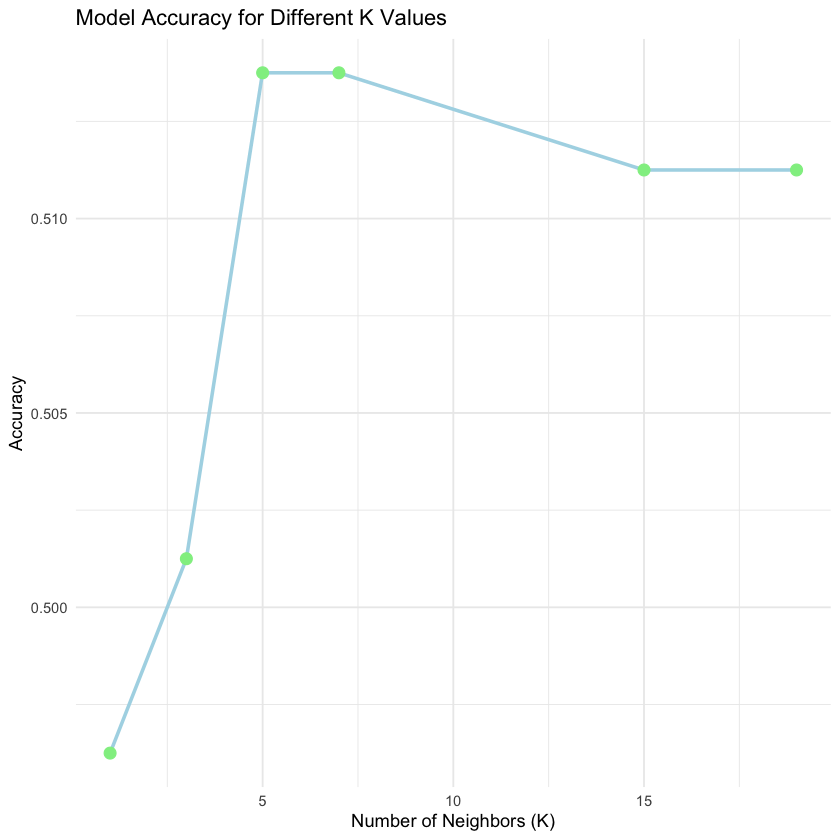

In [71]:
library(ggplot2)
 
# Data preparation
k_values <- c(1, 3, 5, 7, 15, 19)
 
# Calculate accuracy for each k value
accuracy_values <- sapply(k_values, function(k) {
  test_pred <- knn(train = train_scale, 
                        test = test_scale, 
                        cl = data.train$target, 
                        k = k)
  1 - mean(test_pred != data.train$target)
})
 
# Create a data frame for plotting
accuracy_data <- data.frame(K = k_values, Accuracy = accuracy_values)
 
# Plotting
ggplot(accuracy_data, aes(x = K, y = Accuracy)) +
  geom_line(color = "lightblue", size = 1) +
  geom_point(color = "lightgreen", size = 3) +
  labs(title = "Model Accuracy for Different K Values",
       x = "Number of Neighbors (K)",
       y = "Accuracy") +
  theme_minimal()